In [452]:
from pptx import Presentation
import xlwt 
from xlwt import Workbook 
import glob  
# Workbook is created 
wb = Workbook() 
  
# add_sheet is used to create sheet. 
sheet1 = wb.add_sheet('Sheet 1',cell_overwrite_ok=True) 
#sheet1.write(1, 0, 1) 
#sheet1.write(2, 0, 2) 
#sheet1.write(0, 0, 'slide number') 
#sheet1.write(0,1,'shapetype')
#sheet1.write(0,2,'id')
#sheet1.write(0,3,'type')

#local_pptxFileList = ["ppt25"]

p=0
q=0
sheet1.write(p, q, 'no_slides') 
sheet1.write(p, q+1, 'no_Table')
sheet1.write(p, q+2, 'no_Picture')
sheet1.write(p, q+3, 'No_fonttypes')
sheet1.write(p, q+4, 'No_fontsizes')
sheet1.write(p, q+5, 'No_fontcolor')
sheet1.write(p, q+6, 'Bold')
sheet1.write(p, q+7,'Underline')
sheet1.write(p, q+8, 'Italic')
sheet1.write(p, q+9, 'Max_font_size')
sheet1.write(p, q+10, 'Min_font_size')
sheet1.write(p, q+11, 'no_of_hlink')
sheet1.write(p, q+12, 'footer')
sheet1.write(p, q+13, 'Date')
sheet1.write(p, q+14, 'Slide number')

#for i in local_pptxFileList:
for i in glob.glob("e:\ppt\\*.pptx"):
            fontx=[] #font name
            fonts2=[]# font size
            fonts3=[] #hyperlink
            color1=[] #font color
           
            #fonty=[] # font size
            c=1
            c1=1
            c2=0
            c4=1
            max=1
            min=200
            table=0
            chart=0
            picture=0
            p=p+1
            sheet1.write(p, q, 0) 
            sheet1.write(p, q+1, 0)
            sheet1.write(p, q+2, 0)
            sheet1.write(p, q+3, 0)
            sheet1.write(p, q+4, 0)
            sheet1.write(p, q+5, 0)
            sheet1.write(p, q+6, 0)
            sheet1.write(p, q+7, 0)
            sheet1.write(p, q+8, 0)
            sheet1.write(p, q+9, 0)
            sheet1.write(p, q+10, 0)
            sheet1.write(p, q+11, 0)
            sheet1.write(p, q+12, 0)
            sheet1.write(p, q+13, 0)
            sheet1.write(p, q+14, 0)
            print(i) 
            sheet1.write(p,q+16,i)
            count=0
            ppt = Presentation(i)
            #print(ppt.slide_layouts)
            for slide in ppt.slides:
                count=count+1 
                print('\nslide number'+str(count))
                 
                for shape in slide.shapes:
                #    print("shpae name is")
                 #   print(shape.shape_type)
                    if(shape.shape_type==13): #picture
                        #sheet1.write(p, q+9, 1)  
                        picture=picture+1
                        #print("picture")
                    if(shape.shape_type==3): # chart
                        #sheet1.write(p, q+8, 1)
                        chart=chart+1
                    if(shape.shape_type==19): #table
                        #sheet1.write(p, q+7, 1) 
                        table=table+1
                        
                                  
                    
                        
                    if shape.is_placeholder:
                        phf = shape.placeholder_format
                        print('%d, %s' % (phf.idx, phf.type))
                        if(phf.type==15):             #footer 
                                sheet1.write(p,q+12,2)
                        if(phf.type==16):             #date
                                sheet1.write(p,q+13,2)
                        if(phf.type==13):            #slide number
                                sheet1.write(p,q+14,2)
                        
                    if (shape.shape_type==17 or shape.shape_type==14): 
                            if not shape.has_text_frame:
                                print("no textframe")
                                continue
                            for paragraph in shape.text_frame.paragraphs:  
                                for run in paragraph.runs:  
                                    #display(shape.text)
                                    font = run.font
                                    print(shape.name)
                                    #display(font.size.pt)
                                    font_name= font.name
                                    if font_name!=None and font_name not in fontx and font_name!='hvb':                                                
                                            fontx.append(font_name)
                                            c=c+1  
                                            display(font_name)                                             
                                    if font.size!=None:
                                        font_size=font.size.pt
                                        if font.size.pt not in fonts2:
                                                display(font_size)
                                                fonts2.append(font_size)
                                                if(max<font_size):
                                                       max=font_size
                                                if(min>font_size):
                                                       min=font_size 
                                                c1=c1+1   
                                     
                                    hlink=run.hyperlink
                                    if hlink.address not in fonts3 and  hlink.address !=None:
                                              #sheet1.write(p,q+18,1)
                                              fonts3.append(hlink.address)
                                              c2=c2+1  
                                                           
                                    if font.bold != None:
                                        sheet1.write(p, q+6,1)
                                            
                                    if font.underline !=None:
                                               sheet1.write(p, q+7,1)
                                    if font.italic!=None:
                                               sheet1.write(p, q+8,1)
                                  
                                    try:
                                         if font.color.rgb not in color1 and font.color!=None:
                                                color1.append(font.color.rgb)
                                                c4=c4+1
                                    except:
                                             pass
                            #for shape in slide.placeholders:
                             #       print('shape id %d shape name%s' % (shape.placeholder_format.idx, shape.name))
               
            if(count>=10 and count<=22):
                sheet1.write(p,q,2)  
            elif(count<10 or count>35):
                sheet1.write(p,q,0)
            else:
                sheet1.write(p,q,1)
            if(max>=24):
                sheet1.write(p,q+9,2)
            else:
                sheet1.write(p,q+9,1)
            if(min<12):
                sheet1.write(p,q+10,0)
            elif (min>18 or min<30):
                sheet1.write(p,q+10,2)
            else:
                sheet1.write(p,q+10,1)
            if(c>=2 and c<=3):
                sheet1.write(p,q+3,2) 
            elif(c==1):
                sheet1.write(p,q+3,1)
            else:
                 sheet1.write(p,q+3,0)
            if(c2>=1):
                sheet1.write(p,q+11,1)
           # sheet1.write(p,q+4,c1)
            #sheet1.write(p,q+11,c2)
            if(c4>=2 and c4<=4):
                sheet1.write(p,q+5,2)
            elif(c4>4 and c4<7):
                sheet1.write(p,q+5,1)
            else:
                sheet1.write(p,q+5,0)
            if(table==0):
                sheet1.write(p,q+1,0)
            elif (table<2 or table>5):
                sheet1.write(p,q+1,1)
            else:
                sheet1.write(p,q+1,3)
            #sheet1.write(p,q+1,table)
            if(picture==0):
                sheet1.write(p,q+2,0)
            elif (picture<2 or picture>5):
                sheet1.write(p,q+2,1)
            else:
                sheet1.write(p,q+2,3)
            #sheet1.write(p,q+2,picture)
            
            print("\nfont name")
            print(fontx)
            print("\nfont size")
            print(fonts2)
            print("\nhyperlink")
            print(fonts3)
            print("\ncolor")
            print(color1)
            print("\nnumber of font name")
            print(c)
            print("\nnumber of font size")
            print(c1)
            print("\n number of hyperlink")
            print(c2)
            print("\n number of color")
            print(c4)
            print("\n number of pictures")
            print(picture)
            print("\n number of chart")
            print(chart)
            print("\n number of tables")
            print(table)
            print("\n maximum font size")
            print(max)
            print("\n minimum font size")
            print(min)

p=p+1
wb.save('xxx.xls')                





e:\ppt\01.pptx

slide number1
TextShape 1


'Times New Roman'

32.0


slide number2
0, TITLE (1)
Title 1


24.0

1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number3
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2

slide number4
0, TITLE (1)
Title 1


28.0

Title 1
Title 1
1, OBJECT (7)

slide number5
0, TITLE (1)
Title 1
1, OBJECT (7)
no textframe

slide number6
0, TITLE (1)
Title 1


'+mn-lt'

1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2


18.0


slide number7
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2

slide number8
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2


20.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number9
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2


16.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number10
0, TITLE (1)
Title 1


72.0


font name
['Times New Roman', '+mn-lt']

font size
[32.0, 24.0, 28.0, 18.0, 20.0, 16.0, 72.0]

hyperlink
[]

color
[(255, 0, 0)]

number of font name
3

number of font size
8

 number of hyperlink
0

 number of color
2

 number of pictures
2

 number of chart
0

 number of tables
1

 maximum font size
72.0

 minimum font size
16.0
e:\ppt\02.pptx

slide number1
0, CENTER_TITLE (3)
Title 1
1, SUBTITLE (4)
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2

slide number2
0, CENTER_TITLE (3)
Title 1


'Algerian'

66.0

1, SUBTITLE (4)
Subtitle 2


'Agency FB'

24.0

Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2

slide number3
0, CENTER_TITLE (3)
Title 1


54.0

1, SUBTITLE (4)
Subtitle 2


64.0

Subtitle 2

slide number4
0, TITLE (1)
Title 1


44.0

1, OBJECT (7)
no textframe

slide number5
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2


'Calibri'

26.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2


29.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number6
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2


20.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number7
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2

slide number8
0, TITLE (1)
Title 9


48.0

1, OBJECT (7)

slide number9
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number10
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2


36.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number11
0, CENTER_TITLE (3)
Title 1
1, SUBTITLE (4)
Subtitle 2


'Aharoni'

40.0

Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2

font name
['Algerian', 'Agency FB', 'Calibri', 'Aharoni']

font size
[66.0, 24.0, 54.0, 64.0, 44.0, 26.0, 29.0, 20.0, 48.0, 36.0, 40.0]

hyperlink
[]

color
[]

number of font name
5

number of font size
12

 number of hyperlink
0

 number of color
1

 number of pictures
0

 number of chart
0

 number of tables
1

 maximum font size
66.0

 minimum font size
20.0
e:\ppt\03.pptx

slide number1
0, CENTER_TITLE (3)
Title 1


'Times New Roman'

24.0

1, SUBTITLE (4)
Subtitle 2


44.0


slide number2
0, TITLE (1)
Title 1


28.0

1, OBJECT (7)
Content Placeholder 2


20.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
14, DATE (16)
15, SLIDE_NUMBER (13)
16, FOOTER (15)
Footer Placeholder 5

slide number3
0, TITLE (1)
Title 1
Title 1
Title 1
1, OBJECT (7)
Content Placeholder 2
14, DATE (16)
15, SLIDE_NUMBER (13)
16, FOOTER (15)
Footer Placeholder 5

slide number4
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
14, DATE (16)
15, SLIDE_NUMBER (13)
16, FOOTER (15)
Footer Placeholder 5

slide number5
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
14, DATE (16)
15, SLIDE_NUMBER (13)
16, FOOTER (15)
Footer Placeholder 5

slide number6
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content 

18.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
14, DATE (16)
15, SLIDE_NUMBER (13)
16, FOOTER (15)
Footer Placeholder 5

font name
['Times New Roman']

font size
[24.0, 44.0, 28.0, 20.0, 18.0]

hyperlink
[]

color
[(255, 0, 0)]

number of font name
2

number of font size
6

 number of hyperlink
0

 number of color
2

 number of pictures
0

 number of chart
0

 number of tables
3

 maximum font size
44.0

 minimum font size
18.0
e:\ppt\06.pptx

slide number1
0, CENTER_TITLE (3)
Title 1


'Times New Roman'

1, SUBTITLE (4)
Subtitle 2
Subtitle 2


24.0

Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2

slide number2
0, TITLE (1)
Title 1


44.0

1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
11, FOOTER (15)
Footer Placeholder 4

slide number3
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
11, FOOTER (15)
Footer Placeholder 4

slide number4
0, TITLE (1)
Title 1
Title 1
Title 1
1, OBJECT (7)
no textframe
10, DATE (16)
11, FOOTER (15)
Footer Placeholder 5

slide number5
1, OBJECT (7)
no textframe
10, DATE (16)
11, FOOTER (15)
Footer Placeholder 3

slide number6
0, TITLE (1)
Title 1
1, OBJECT (7)
no textframe
10, DATE (16)
11, FOOTER (15)
Footer Placeholder 4

slide number7
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2


16.0

Content Placeholder 2


14.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2


20.0

10, DATE (16)
11, FOOTER (15)
Footer Placeholder 4

slide number8
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
11, FOOTER (15)
Footer Placeholder 7

slide number9
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
11, FOOTER (15)
Footer Placeholder 4

slide number10
0, TITLE (1)
Title 1


40.0

1, OBJECT (7)
Content Placeholder 2


12.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
11, FOOTER (15)
Footer Placeholder 4

slide number11
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placehold

'Times New Roman'

44.0

1, SUBTITLE (4)
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2

slide number2
1, OBJECT (7)
Content Placeholder 1
Content Placeholder 1
Content Placeholder 1
Content Placeholder 1
Content Placeholder 1
Content Placeholder 1
Content Placeholder 1
Content Placeholder 1
0, TITLE (1)
Title 2

slide number3
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number4
0, TITLE (1)
Title 1

slide number5
0, TITLE (1)
Title 1
TextBox 44


16.0

TextBox 45
TextBox 47
TextBox 48
TextBox 49
TextBox 52

slide number6
0, TITLE (1)
Title 1


40.0


font name
['Times New Roman']

font size
[44.0, 16.0, 40.0]

hyperlink
[]

color
[(0, 0, 0)]

number of font name
2

number of font size
4

 number of hyperlink
0

 number of color
2

 number of pictures
4

 number of chart
0

 number of tables
1

 maximum font size
44.0

 minimum font size
16.0
e:\ppt\100.pptx

slide number1
0, CENTER_TITLE (3)
Title 1
1, SUBTITLE (4)
Subtitle 2

slide number2
0, TITLE (1)
Title 1


'Times New Roman'

20.0

Title 1


28.0

Title 1
Title 1


24.0

Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1

slide number3
0, TITLE (1)
Title 1
Title 1
1, OBJECT (7)
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5

slide number4
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number5
0, TITLE (1)
Title 1
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeh

22.0

Title 1
1, OBJECT (7)
Content Placeholder 6


23.0

Content Placeholder 6
Content Placeholder 6
Content Placeholder 6
Content Placeholder 6
Content Placeholder 6
Content Placeholder 6

slide number7
TextBox 1
TextBox 2
TextBox 3
TextBox 3
TextBox 3

slide number8
TextBox 1
TextBox 3
TextBox 3
TextBox 3


'Arial'

TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3

slide number9
TextBox 1
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4

slide number10
TextBox 1
TextBox 4
TextBox 4
TextBox 4
TextBox 4

slide number11
0, TITLE (1)
Title 1
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3

slide number12
0, TITLE (1)
Title 1
Title 1
Title 1


18.0

Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1

slide number13

slide number14
TextBox 1
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3

slide number15
TextBox 1
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2

slide number16

slide number17
TextBox 1

slide number18

slide number19

slide number20

slide number21

font name
['Times New Roman', 'Arial']

font size
[20.0, 28.0, 24.0, 22.0, 23.0, 18.0]

hyperlink
[]

color
[(0, 32, 96), (0, 0, 0)]

number of font name
3

number of font size
7

 number of hyperlink
0

 number of color
3

 number of pictures
8

 number of chart
0

 number of tables
0

 maximum font size
28.0

 minimum font size
18.0
e:\ppt\101.pptx

slide number1
0, CENTER_TITLE (3)
1, SUBTITLE (4)
object 3


'Arial'

77.0

object 3
object 3
object 3
object 3
object 4


22.0

object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
TextBox 5
TextBox 5
TextBox 5
TextBox 5

slide number2
object 3


14.0

object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 10


48.0

object 10
object 10
object 10
object 10
object 10
object 10


13.5

object 10
object 10
object 10
object 10
object 10
object 10
object 10
object 10

slide number3
object 8


20.0

object 8
object 8
object 8
object 8
object 8
object 8
object 8
object 8
object 8
object 8
object 8
object 8
object 8
object 8
object 8
object 8
object 8
object 8
object 8
object 8
object 8
object 8
object 8
object 8
object 8
object 8
object 8
object 8
object 8
object 8
object 8
object 8
object 8
object 8
object 8
object 8
object 9


15.0

object 9
object 9
object 9
object 9
object 9
object 9
object 9
object 9
object 9
object 9
object 9
object 9
object 9
object 9
object 9
object 9
object 9
object 10
object 10
object 10
object 10
object 10
object 10
object 10
object 10
object 10
object 10
object 10
object 10
object 10
object 10
object 10
object 10
object 10
object 11
object 11
object 11
object 11
object 11
object 11
object 11
object 11
object 11
object 11
object 11
object 11
object 11
object 11
object 11
object 11
object 11
object 11
object 11
object 11
object 11
object 11
object 11
object 11
object 12
object 12
object 12
object 12
object 12
object 12
object 12
object 12
object 12
object 12
object 12
object 12
object 12
object 12
object 12
object 12
object 12
0, TITLE (1)
object 13


36.0

object 13
object 13
object 13
object 13
object 13
object 13
object 13
object 13
object 13
object 13
object 13

slide number4
object 4


16.0

object 5
object 6
object 9


18.0

object 9
object 11
object 11
object 11
object 11
object 13
object 13
object 15
object 15
object 16
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 19


10.0

object 20
object 20
object 20
object 20
object 20
object 20
object 20
object 20
object 20
object 20
object 20
object 20
object 20
object 20
object 20
object 20
object 20
object 20
object 20
object 20
object 20
object 20
object 20
object 20
object 20
object 20
object 20
object 20
object 21
object 21
object 21
object 21
object 21
object 21
object 21
object 21
object 21
object 22
object 22
object 22
object 22
object 22
object 22
object 22
object 22
object 22
object 23
object 23
object 23

slide number5
0, TITLE (1)
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
objec

12.0

object 9
object 9
object 9
object 9
object 9
object 9
object 9
object 9
object 9
object 9
object 9
object 9
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 17
object 18
object 18
object 18
object 18
object 19
object 19
object 19
object 19
object 19
object 19

slide number6
object 2


28.0

object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
0, TITLE (1)
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 25
object 25
object 25
object 26
object 26
object 27
object 27
object 27
object 28
object 28
object 29
object 29
object 30
object 30
object 31
object 32
object 32
object 33
object 34
object 34
object 34
object 34
object 35
object 35
object 35
object 36
object 36
object 36
object 36
object 37
object 37
object 37
object 37
object 37
object 37
object 38
object 38
object 38
object 38
obj

45.0

object 6
object 6
object 6
object 6
object 6
object 6
object 6
object 6
object 6
object 6
object 6
object 6
object 6
object 6
object 6
7, SLIDE_NUMBER (13)
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
object 7
0, TITLE (1)
object 8
object 8
object 8
object 8
object 8
object 8
object 8
object 8
object 8
object 8
object 8
object 9
object 9
object 9
object 9
object 9
object 9
object 9
object 9
obj

88.0


slide number12
7, SLIDE_NUMBER (13)
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2


132.0

object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3

slide number15
0, TITLE (1)
object 5


'Candara'

object 5
object 5
object 5

font name
['Arial', 'Candara']

font size
[77.0, 22.0, 14.0, 48.0, 13.5, 20.0, 15.0, 36.0, 16.0, 18.0, 10.0, 12.0, 28.0, 45.0, 88.0, 132.0]

hyperlink
[]

color
[(255, 255, 255), (0, 185, 255), (112, 48, 160), (160, 0, 255)]

number of font name
3

number of font size
17

 number of hyperlink
0

 number of color
5

 number of pictures
0

 number of chart
0

 number of tables
9

 maximum font size
132.0

 minimum font size
10.0
e:\ppt\102.pptx

slide number1
0, CENTER_TITLE (3)
Title 1


60.0

1, SUBTITLE (4)
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number2
0, TITLE (1)
Title 1
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number3
0, TITLE (1)
Title 1
TextBox 2


24.0

TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number4
0, TITLE (1)
Title 1
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number5
0, TITLE (1)
Title 1
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 5


9.0

TextBox 5
TextBox 5
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number6
0, TITLE (1)
Title 1
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 6
TextBox 6
TextBox 6
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number7
0, TITLE (1)
Title 1
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number8
0, TITLE (1)
Title 1
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number9
0, TITLE (1)
Title 1
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 10
TextBox 10
TextBox 10
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number10
0, TITLE (1)
Title 1
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number11
0, TITLE (1)
Title 1
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number12
0, TITLE (1)
Title 1
TextBox 2
TextBox 2
TextBox 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number13
0, TITLE (1)
Title

20.0

Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
3, BODY (2)
Text Placeholder 4
4, OBJECT (7)
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number18
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number19
0, TITLE (1)
Title 1
TextBox 2


'Calibri'

18.0

TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number20
10, DATE (16)
12, SLIDE_NUMBER (13)

font name
['Calibri']

font size
[60.0, 24.0, 9.0, 20.0, 18.0]

hyperlink
['https://www.etechwall.com/2019/08/the-evaluation-of-mobile-networks-4g-vs-5g/', 'https://creativecommons.org/licenses/by-nd/3.0/', 'https://en.wikipedia.org/wiki/Advanced_Mobile_Phone_System', 'https://creativecommons.org/licenses/by-sa/3.0/', 'https://geobrava.wordpress.com/2013/09/10/how-4g-adoption-drives-mobile-internet-use-in-the-uk/', '102.pptx']

color
[(255, 255, 255), (0, 0, 0)]

number of font name
2

number of font size
6

 number of hyperlink
6

 number of color
3

 number of pictures
12

 number of chart
0

 number of tables
0

 maximum font size
60.0

 minimum font size
9.0
e:\ppt\103.pptx

slide number1
0, CENTER_TITLE (3)
Title 1
TextBox 6
TextBox 6
TextBox 7
TextBox 7
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number2
0, TITLE (1)
Title 1


'Charter'

10, DATE (16)
12, SLIDE_NUMBER (13)

slide number3
0, TITLE (1)
Title 1


40.0

1, OBJECT (7)
Content Placeholder 2


28.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number4
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2


24.0

Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number5
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number6
0, TITLE (1)
Title 4
1, OBJECT (7)
Content Placeholder 6
Content Placeholder 6
Content Placeholder 6
Content Placeholder 6
Content Placeholder 6


20.0

10, DATE (16)
12, SLIDE_NUMBER (13)

slide number7
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 4
Content Placeholder 4
Content Placeholder 4
Content Placeholder 4
Content Placeholder 4
Content Placeholder 4
Content Placeholder 4
Content Placeholder 4
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number8
0, TITLE (1)
Title 1
Title 1
1, OBJECT (7)
Content Placeholder 4
Content Placeholder 4
Content Placeholder 4
Content Placeholder 4
Content Placeholder 4
Content Placeholder 4
Content Placeholder 4


22.0

Content Placeholder 4
Content Placeholder 4
Content Placeholder 4
Content Placeholder 4
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number9
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number10
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number11
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number12
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeho

44.0

10, DATE (16)
12, SLIDE_NUMBER (13)

font name
['Charter']

font size
[40.0, 28.0, 24.0, 20.0, 22.0, 44.0]

hyperlink
['103.pptx']

color
[(153, 202, 60), (112, 48, 160), (0, 112, 192)]

number of font name
2

number of font size
7

 number of hyperlink
1

 number of color
4

 number of pictures
11

 number of chart
0

 number of tables
0

 maximum font size
44.0

 minimum font size
20.0
e:\ppt\104.pptx

slide number1
0, CENTER_TITLE (3)
Title 1


40.0

1, SUBTITLE (4)
Subtitle 2

slide number2
0, TITLE (1)
Title 3


36.0

1, BODY (2)
Text Placeholder 4
Text Placeholder 4
Text Placeholder 4
Text Placeholder 4
Text Placeholder 4
Text Placeholder 4
Text Placeholder 4
Text Placeholder 4
Text Placeholder 4
Text Placeholder 4
Text Placeholder 4
12, SLIDE_NUMBER (13)
Slide Number Placeholder 1

slide number3
0, TITLE (1)
Title 6
13, BODY (2)
Text Placeholder 9
Text Placeholder 9
Text Placeholder 9
Text Placeholder 9
Text Placeholder 9
Text Placeholder 9
12, SLIDE_NUMBER (13)
Slide Number Placeholder 1

slide number4
0, TITLE (1)
Title 3
12, SLIDE_NUMBER (13)
Slide Number Placeholder 1
2, BODY (2)
Text Placeholder 7
Text Placeholder 7
Text Placeholder 7
Text Placeholder 7
4, BODY (2)
Text Placeholder 5
Text Placeholder 5
Text Placeholder 5
Text Placeholder 5

slide number5
0, TITLE (1)
Title 3
12, SLIDE_NUMBER (13)
Slide Number Placeholder 1
2, BODY (2)
Text Placeholder 7
Text Placeholder 7
Text Placeholder 7
Text Placeholder 7
Text Placeholder 7
4, BODY (2)
Text Placeholder 5
Text Placeholder 5
Text Placeholde

24.0

Text Placeholder 7
Text Placeholder 7
Text Placeholder 7
Text Placeholder 7
Text Placeholder 7
4, BODY (2)
Text Placeholder 5
Text Placeholder 5
Text Placeholder 5
Text Placeholder 5
Text Placeholder 5
Text Placeholder 5
Text Placeholder 5

slide number7
0, TITLE (1)
Title 3
12, SLIDE_NUMBER (13)
Slide Number Placeholder 1
2, BODY (2)
Text Placeholder 7
Text Placeholder 7


20.0

Text Placeholder 7
Text Placeholder 7
Text Placeholder 7
Text Placeholder 7
Text Placeholder 7
4, BODY (2)
Text Placeholder 5


28.0

Text Placeholder 5
Text Placeholder 5
Text Placeholder 5
Text Placeholder 5

slide number8
0, TITLE (1)
Title 3
12, SLIDE_NUMBER (13)
Slide Number Placeholder 1
2, BODY (2)
Text Placeholder 7
Text Placeholder 7
Text Placeholder 7
Text Placeholder 7
Text Placeholder 7
Text Placeholder 7
Text Placeholder 7

slide number9
0, TITLE (1)
Title 3
12, SLIDE_NUMBER (13)
Slide Number Placeholder 1
2, BODY (2)
Text Placeholder 7
Text Placeholder 7


22.0

Text Placeholder 7
Text Placeholder 7
Text Placeholder 7
Text Placeholder 7
Text Placeholder 7
Text Placeholder 7
Text Placeholder 7
Text Placeholder 7
Text Placeholder 7
Text Placeholder 7
Text Placeholder 7
Text Placeholder 7
Text Placeholder 7

slide number10
0, TITLE (1)
Title 6
13, BODY (2)
Text Placeholder 9
Text Placeholder 9
Text Placeholder 9
Text Placeholder 9
Text Placeholder 9
Text Placeholder 9
Text Placeholder 9
12, SLIDE_NUMBER (13)
Slide Number Placeholder 1

slide number11
0, TITLE (1)
Title 3
12, SLIDE_NUMBER (13)
Slide Number Placeholder 1
2, BODY (2)
Text Placeholder 7
Text Placeholder 7
Text Placeholder 7
Text Placeholder 7
Text Placeholder 7

slide number12
0, TITLE (1)
Title 3
12, SLIDE_NUMBER (13)
Slide Number Placeholder 1
2, BODY (2)
Text Placeholder 7
Text Placeholder 7
Text Placeholder 7
Text Placeholder 7
Text Placeholder 7
Text Placeholder 7

slide number13
0, TITLE (1)
Title 3
12, SLIDE_NUMBER (13)
Slide Number Placeholder 1
2, BODY (2)
Text Placeholder 7

18.0

Text Placeholder 9
12, SLIDE_NUMBER (13)
Slide Number Placeholder 1

slide number15
0, CENTER_TITLE (3)
Title 1

font name
[]

font size
[40.0, 36.0, 24.0, 20.0, 28.0, 22.0, 18.0]

hyperlink
[]

color
[]

number of font name
1

number of font size
8

 number of hyperlink
0

 number of color
1

 number of pictures
2

 number of chart
0

 number of tables
0

 maximum font size
40.0

 minimum font size
18.0
e:\ppt\105.pptx

slide number1
TextBox 4


'Arial'

96.0

TextBox 5


40.0

TextBox 6


'Abhaya Libre Regular'

36.0

TextBox 6


24.0

TextBox 6


'Pathway Gothic One'

32.0

TextBox 6


20.0


slide number2
TextBox 2


28.0

TextBox 2
TextBox 2
TextBox 3
TextBox 3
TextBox 4


60.0

TextBox 5
TextBox 6
TextBox 7
TextBox 8
TextBox 9
TextBox 11
TextBox 12
TextBox 13
TextBox 14

slide number3
TextBox 7
TextBox 8
TextBox 8
TextBox 8
TextBox 9
TextBox 9
TextBox 9

slide number4
TextBox 4
TextBox 4
TextBox 4
TextBox 5
TextBox 6


'Montserrat'

70.23

TextBox 8
TextBox 8

slide number5
TextBox 7

slide number6
TextBox 3
TextBox 4
TextBox 5
TextBox 5

slide number7
TextBox 3
TextBox 4
TextBox 4
TextBox 4

slide number8
TextBox 5
TextBox 9
TextBox 9
TextBox 9
TextBox 9

slide number9
TextBox 7

slide number10
TextBox 4
TextBox 5


54.0

TextBox 6
TextBox 6
TextBox 6

slide number11
TextBox 4


40.1

TextBox 5


44.0

TextBox 5


47.23

TextBox 6
TextBox 6
TextBox 6
TextBox 6
TextBox 6

slide number12
TextBox 6
TextBox 7
TextBox 8

slide number13
TextBox 4
TextBox 5

font name
['Arial', 'Abhaya Libre Regular', 'Pathway Gothic One', 'Montserrat']

font size
[96.0, 40.0, 36.0, 24.0, 32.0, 20.0, 28.0, 60.0, 70.23, 54.0, 40.1, 44.0, 47.23]

hyperlink
[]

color
[(255, 255, 255), (255, 67, 27), (0, 0, 0)]

number of font name
5

number of font size
14

 number of hyperlink
0

 number of color
4

 number of pictures
29

 number of chart
0

 number of tables
0

 maximum font size
96.0

 minimum font size
20.0
e:\ppt\106.pptx

slide number1
TextBox 4


'Times New Roman'

24.0

TextBox 7


32.0

TextBox 8
TextBox 8
TextBox 8
TextBox 8
TextBox 8
TextBox 8
TextBox 8
TextBox 8
TextBox 8
TextBox 8
TextBox 8
TextBox 8
TextBox 8
TextBox 9
TextBox 9
TextBox 9
TextBox 9
TextBox 9
TextBox 9
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number2
0, TITLE (1)
Title 1


28.0

Title 1
1, OBJECT (7)
Content Placeholder 2


20.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number3
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
2, BODY (2)
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number4
0, TITLE (1)
Title 4
Title 4
Title 4
Title 4
1, OBJECT (7)
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
10, DATE (16)
12, SLIDE_NUMBER (13)

slide n

31.0

Title 1
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number6
0, TITLE (1)
Title 1
Title 1
Title 1
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number7
0, TITLE (1)
Title 1
Title 1
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number8
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Plac

'Calibri'

18.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number12
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number13
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number14
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number15
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeh

'Times New Roman'

24.0

Subtitle 2
TextBox 7


20.0

TextBox 7
TextBox 7
TextBox 7
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number2
TextBox 2


44.0

TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number3
TextBox 4


32.0

TextBox 5
TextBox 5
TextBox 5
TextBox 5
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number4
TextBox 2
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number5
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number6
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number7
TextBox 2


'Helvetica Neue'

TextBox 2
TextBox 2
TextBox 2
TextBox 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number8
TextBox 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number9
TextBox 2
TextBox 2
TextBox 2
TextBox 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number10
TextBox 2
TextBox 3
TextBox 3
TextBox 3
TextBox 3
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number11
TextBox 2
TextBox 3
TextBox 3
TextBox 3
TextBox 3
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number12
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number13
TextBox 2
10, DATE (16)
12, SLIDE_NUMBER (13)

font name
['Times New Roman', 'Helvetica Neue']

font size
[24.0, 20.0, 44.0, 32.0]

hyperlink
[]

color
[(59, 56, 53)]

number of font name
3

number of font size
5

 number of hyperlink
0

 number of color
2

 number of pictures
4

 number of chart
0

 number of tables
0

 maximum font size
44.0

 minimum font size
20.0
e:\ppt\108.pptx

slide number1
1, SUBTI

'Times New Roman'

32.0

Subtitle 2
Subtitle 2
Subtitle 2


24.0

Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2

slide number2
0, TITLE (1)
Title 1


36.0

1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number3
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number4
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2

slide number5
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number6
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2


20.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number7
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2


28.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number8
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number9
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number10
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Place

'Arial'

Content Placeholder 2
0, TITLE (1)
Title 1

slide number15
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number16
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 8
Content Placeholder 8
Content Placeholder 8
Content Placeholder 8
Content Placeholder 8
Content Placeholder 8
Content Placeholder 8
Content Placeholder 8

slide number17
1, OBJECT (7)
Content Placeholder 2


26.0

Content Placeholder 2


30.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number18
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number19
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number20
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2


22.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number21
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number22
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2

slide number23
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number24
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number25
0, TITLE (1)
Title 1

font name
['Times New Roman', 'Arial']

font size
[32.0, 24.0, 36.0, 20.0, 28.0, 26.0, 30.0, 22.0]

hyperlink
[]

color
[(0, 0, 0)]

number of font name
3

number of font size
9

 number of hyperlink
0

 number of color
2

 number of pictures
4

 number of chart
0

 number

'Share Tech'

Google Shape;455;p23
0, CENTER_TITLE (3)
Google Shape;456;p23


38.0

Google Shape;456;p23

slide number2
1, BODY (2)
Google Shape;461;p24


18.0

Google Shape;461;p24
Google Shape;461;p24
Google Shape;461;p24
Google Shape;461;p24
Google Shape;461;p24
Google Shape;461;p24
Google Shape;461;p24
Google Shape;461;p24
0, CENTER_TITLE (3)
Google Shape;462;p24


32.0


slide number3
1, BODY (2)
Google Shape;467;p25
Google Shape;467;p25
Google Shape;467;p25
Google Shape;467;p25
Google Shape;467;p25
0, CENTER_TITLE (3)
Google Shape;468;p25

slide number4
4, CENTER_TITLE (3)
Google Shape;479;p26

slide number5
8, CENTER_TITLE (3)
Google Shape;487;p27
Google Shape;501;p27
Google Shape;503;p27
Google Shape;505;p27
Google Shape;507;p27
Google Shape;511;p27
Google Shape;512;p27
Google Shape;513;p27

slide number6
8, CENTER_TITLE (3)
Google Shape;518;p28

slide number7
0, CENTER_TITLE (3)
Google Shape;525;p29

slide number8
0, CENTER_TITLE (3)
Google Shape;532;p30
Google Shape;533;p30
Google Shape;533;p30
Google Shape;533;p30

slide number9
0, CENTER_TITLE (3)
Google Shape;540;p31
Google Shape;541;p31
Google Shape;541;p31
Google Shape;541;p31
Google Shape;541;p31
Google Shape;541;p31
Google Shape;541;p31
Google Shape;541;p31

slide number10
0, CENTER_TITLE (3)
Google Shape;548;p32
Google Shape;549;p32

slide number11
0, CENTER_TITLE (3)
Google Shape;557;p33

43.0


font name
['Share Tech']

font size
[38.0, 18.0, 32.0, 43.0]

hyperlink
[]

color
[]

number of font name
2

number of font size
5

 number of hyperlink
0

 number of color
1

 number of pictures
11

 number of chart
0

 number of tables
1

 maximum font size
43.0

 minimum font size
18.0
e:\ppt\11.pptx

slide number1
0, CENTER_TITLE (3)
Title 1
Title 1
1, SUBTITLE (4)
Subtitle 2


56.0

Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2

slide number2
0, TITLE (1)
Title 1
Title 1


44.0

Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)
11, FOOTER (15)
Footer Placeholder 5

slide number3
0, TITLE (1)
Title 1
Title 1
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)
11, FOOTER (15)
Footer Placeholder 5

slide number4
0, TITLE (1)
Title 1


48.0

Title 1
1, OBJECT (7)
no textframe
10, DATE (16)
12, SLIDE_NUMBER (13)
11, FOOTER (15)
Footer Placeholder 5

slide number5
0, TITLE (1)
Title 1
Title 1
1, OBJECT (7)
no textframe
10, DATE (16)
12, SLIDE_NUMBER (13)
11, FOOTER (15)
Footer Placeholder 5

slide number6
0, TITLE (1)
Title 1
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)
11, FOOTER (15)
Footer Placeholder 5

font name
[]

font size
[56.0, 44.0, 48.0]

hyperlink
[]

color
[]

number of font name
1

number of font size

'Times New Roman'

10, PICTURE (18)
no textframe

slide number2
0, CENTER_TITLE (3)
Title 3


40.0

1, SUBTITLE (4)
Subtitle 4


24.0

Subtitle 4
Subtitle 4
Subtitle 4
Subtitle 4
14, SLIDE_NUMBER (13)
10, PICTURE (18)
no textframe

slide number3
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 3


19.0

Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
13, PICTURE (18)
no textframe
15, SLIDE_NUMBER (13)

slide number4
0, TITLE (1)
Title 1
16, SLIDE_NUMBER (13)

slide number5
11, SLIDE_NUMBER (13)
TextBox 10


32.0


slide number6
0, TITLE (1)
Title 11


36.0

1, OBJECT (7)
Content Placeholder 12
Content Placeholder 12
Content Placeholder 12
Content Placeholder 12
Content Placeholder 12
Content Placeholder 12
Content Placeholder 12
Content Placeholder 12
14, SLIDE_NUMBER (13)

slide number7
0, TITLE (1)
Title 1
Title 1
Title 1
Title 1
14, SLIDE_NUMBER (13)

slide number8
0, TITLE (1)
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
14, SLIDE_NUMBER (13)

slide number9
0, TITLE (1)
Title 1
Title 1
Title 1
14, SLIDE_NUMBER (13)

slide number10
0, TITLE (1)
Title 1
Title 1
Title 1
14, SLIDE_NUMBER (13)

slide number11
0, TITLE (1)
Title 11
1, OBJECT (7)
Content Placeholder 12
Content Placeholder 12
Content Placeholder 12
Content Placeholder 12
Content Placeholder 12
14, SLIDE_NUMBER (13)

slide number12
12, BODY (2)
Text Placeholder 4
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Co

24.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number3
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2

slide number4
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2

slide number5
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number6
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number7
0, TITLE (1)
Title 1
1, OBJECT (7)
no textframe

slide number8
0, TITLE (1)
Title 1
1, OBJECT (7)
no textframe

slide number9
0, CENTER_TITLE (3)
Title 1


32.0

1, SUBTITLE (4)

slide number10
0, TITLE (1)
Title 1


28.0

1, OBJECT (7)

slide number11
0, TITLE (1)
Title 1
1, OBJECT (7)

slide number12
0, TITLE (1)
Title 1
1, OBJECT (7)

slide number13
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

font name
[]

font size
[24.0, 32.0, 28.0]

hyperlink
[]

color
[]

number of font name
1

number of font size
4

 number of hyperlink
0

 number of color
1

 number of pictures
0

 number of chart
0

 number of tables
4

 maximum font size
32.0

 minimum font size
24.0
e:\ppt\16.pptx

slide number1
0, CENTER_TITLE (3)
Title 1


'Times New Roman'

32.0

1, SUBTITLE (4)
Subtitle 2


20.0

Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
TextBox 6
TextBox 6

slide number2
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2


24.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
0, TITLE (1)
Title 1
Title 1

slide number3
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
0, TITLE (1)
Title 1

slide number4
1, OBJECT (7)
0, TITLE (1)
Title 1

slide number5
1, OBJECT (7)
0, TITLE (1)
Title 1

slide number6
1, OBJECT (7)
no textframe
0, TITLE (1)
Title 1

slide number7
1, OBJECT (7)
Content Placeholder 2


18.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
0, TITLE (1)
Title 1
Title 1

font name
['Times New Roman']

font size
[32.0, 20.0, 24.0, 18.0]

hyperlink
[]

color
[]

number of font name
2

number of font size
5

 number of hyperlink
0

 number of color
1

 number of pictures
0

 number of chart
0

 number of tables
2

 maximum font size
32.0

 minimum font size
18.0
e:\ppt\17.pptx

slide number1
0, TITLE (1)
1, OBJECT (7)
no textframe
10, DATE (16)
12, SLIDE_NUMBER (13)
11, FOOTER (15)
Footer Placeholder 10

slide number2
TextBox 2


24.0

TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
10, DATE (16)
12, SLIDE_NUMBER (13)
11, FOOTER (15)
Footer Placeholder 5

slide number3
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)
11, FOOTER (15)
Footer Placeholder 6

slide number4
10, DATE (16)
12, SLIDE_NUMBER (13)
11, FOOTER (15)
Footer Placeholder 7

slide number5
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
10, DATE (16)
12, SLIDE_NUMBER (13)
11, FOOTER (15)
Footer Placeholder 6

slide number6
10, DATE (16)
12, SLIDE_NUMBER (13)
11, FOOTER (15)
Footer Placeholder 6

slide number7
10, DATE (16)
12, SLIDE_NUMBER (13)
11, FOOTER (15)
Footer Placeholder 6

slide number8
10, DATE (16)
12, SLIDE_NUMBER (13)
11, FOOTER (15)
Footer Placeholder 5

slide number9
10, DATE (16)
12, SLIDE_NUMBER (13)
11, FOOTER (15)
Footer Placeholder 31

slide number10
1, OBJECT (7)
Content Placeholder 2
Content Placeh

'Times New Roman'

66.0

1, SUBTITLE (4)
Subtitle 4
Subtitle 4
Subtitle 4
Subtitle 4
Subtitle 4
Subtitle 4
Subtitle 4
Subtitle 4

slide number2
0, CENTER_TITLE (3)
Title 3
1, SUBTITLE (4)
Subtitle 4


18.0

Subtitle 4

slide number3
0, CENTER_TITLE (3)
Title 3
1, SUBTITLE (4)
Subtitle 4
Subtitle 4
Subtitle 4
Subtitle 4
Subtitle 4

slide number4
0, CENTER_TITLE (3)
Title 3
1, SUBTITLE (4)
Subtitle 4
Subtitle 4
Subtitle 4

slide number5
0, CENTER_TITLE (3)
Title 3


54.0

1, SUBTITLE (4)

slide number6
0, TITLE (1)
Title 1
1, OBJECT (7)
no textframe

slide number7
0, CENTER_TITLE (3)
Title 3


24.0

1, SUBTITLE (4)
Subtitle 4

slide number8

slide number9

slide number10

font name
['Times New Roman']

font size
[66.0, 18.0, 54.0, 24.0]

hyperlink
[]

color
[(255, 192, 0)]

number of font name
2

number of font size
5

 number of hyperlink
0

 number of color
2

 number of pictures
8

 number of chart
0

 number of tables
1

 maximum font size
66.0

 minimum font size
18.0
e:\ppt\19.pptx

slide number1
0, TITLE (1)
Title 3
Title 3
Title 3
Title 3
Title 3
Title 3
Title 3
Title 3
Title 3
Title 3
Title 3
Title 3


22.0

Title 3
Title 3
Title 3
Title 3
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1

slide number2
0, TITLE (1)
Title 2
1, OBJECT (7)
Content Placeholder 3


'Times New Roman'

Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3

slide number3
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2


20.0

Content Placeholder 2
Content Placeholder 2

slide number4
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number5
0, TITLE (1)
Title 1

slide number6
0, TITLE (1)
Title 1
1, BODY (2)
Text Placeholder 5
2, OBJECT (7)
Content Placeholder 6
Content Placeholder 6
Content Placeholder 6
Content Placeholder 6
Content Placeholder 6
Content Placeholder 6

slide number7

slide number8
TextBox 1

slide number9
TextBox 2


24.0


slide number10

slide number11
TextBox 1


54.0


font name
['Times New Roman']

font size
[22.0, 20.0, 24.0, 54.0]

hyperlink
[]

color
[]

number of font name
2

number of font size
5

 number of hyperlink
0

 number of color
1

 number of pictures
3

 number of chart
0

 number of tables
1

 maximum font size
54.0

 minimum font size
20.0
e:\ppt\20.pptx

slide number1
0, CENTER_TITLE (3)
Title 1


'Times New Roman'

1, SUBTITLE (4)
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2

slide number2
0, TITLE (1)
Title 1


36.0

1, OBJECT (7)
Content Placeholder 2


22.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number3
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Cont

32.0

Title 1
Title 1
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2


24.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number5
0, TITLE (1)
Title 3

slide number6
0, TITLE (1)
Title 3

slide number7
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number8
0, TITLE (1)
Title 1
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Conten

88.0

Title 1

font name
['Times New Roman']

font size
[36.0, 22.0, 32.0, 24.0, 88.0]

hyperlink
[]

color
[]

number of font name
2

number of font size
6

 number of hyperlink
0

 number of color
1

 number of pictures
10

 number of chart
0

 number of tables
0

 maximum font size
88.0

 minimum font size
22.0
e:\ppt\21.pptx

slide number1
0, CENTER_TITLE (3)
Title 1


'Times New Roman'

1, SUBTITLE (4)
Subtitle 2


20.0

Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2

slide number2
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)
11, FOOTER (15)
Footer Placeholder 5

slide number3
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Co

18.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)
11, FOOTER (15)
Footer Placeholder 5

slide number6
0, TITLE (1)
Title 1
1, OBJECT (7)
no textframe
10, DATE (16)
12, SLIDE_NUMBER (13)
11, FOOTER (15)
Footer Placeholder 6

slide number7
0, TITLE (1)
Title 1
1, OBJECT (7)
10, DATE (16)
12, SLIDE_NUMBER (13)
11, FOOTER (15)
Footer Placeholder 7

slide number8
0, TITLE (1)
Title 1
1, OBJECT (7)
10, DATE (16)
12, SLIDE_NUMBER (13)
11, FOOTER (15)
Footer Placeholder 6

slide number9
0, TITLE (1)
Title 1
1, OBJECT (7)
no textframe
10, DATE (16)
12, SLIDE_NUMBER (13)
11, FOOTER (15)
Footer Placeholder 6

slide number10
0, TITLE (1)
Title 1
1, OBJECT (7)
no textframe
10, DATE (16)
12, SLIDE_NUMBER (13)
11, FOOTER (15)
Footer Placeholder 6

slide number11
0, TITLE (1)
Title 1
1, OBJECT (7)
no textframe
10, DATE (16)
12, SLIDE_NUMBER (13)
11, FOOTER (15)
Footer Placeholder 6

sl

36.0

1, OBJECT (7)
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)
11, FOOTER (15)
Footer Placeholder 6

slide number14
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)
11, FOOTER (15)
Footer Placeholder 6

slide number15
0, TITLE (1)
Title 1
1, OBJECT (7)
10, DATE (16)
12, SLIDE_NUMBER (13)
11, FOOTER (15)
Footer Placeholder 8

slide number16
0, TITLE (1)
Title 1
1, OBJECT (7)
no textframe
10, DATE (16)
12, SLIDE_NUMBER (13)
11, FOOTER (15)
Footer Placeholder 5

slide number17
0, TITLE (1)
Title 1
1, OBJECT (7)
no textframe
10, DATE (16)
12, SLIDE_NUMBER (13)
11, FOOTER (15)
Footer Placeholder 5

slide number18
0, TITLE (1)
Title 1
1, OBJECT (7)
no textframe
10, DATE (16)
12, SLIDE_NUMBER (13)
11, FOOTER (15)
Footer Placeholder 5

slide number19
0, TITLE (1)
Title 1
1, OBJECT (7)
no textframe
10, DATE (16)
12, SLIDE_NUMBER (13)
11, FOOTER (15)
Footer Placeholder 5

slide number20
0, TITLE (1)
Title 1
1, OBJECT (7)
no textframe
10, DATE 

35.0

1, SUBTITLE (4)
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2

slide number2
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2


24.0

Content Placeholder 2
Content Placeholder 2

slide number3
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2


'Times New Roman'

Content Placeholder 2
Content Placeholder 2

slide number4
0, TITLE (1)
Title 1
1, OBJECT (7)

slide number5
0, TITLE (1)
1, OBJECT (7)

slide number6
0, TITLE (1)
1, OBJECT (7)

slide number7
0, TITLE (1)
1, OBJECT (7)

slide number8
0, TITLE (1)
1, OBJECT (7)

slide number9
0, TITLE (1)
Title 1
1, OBJECT (7)

slide number10
0, TITLE (1)
Title 1
1, OBJECT (7)
no textframe

slide number11
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2


18.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number12
0, TITLE (1)
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number13
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number14
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number15
0, TITLE (1)
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number16
0, T

'Berlin Sans FB Demi'

96.0

TextBox 8


'Agency FB'

32.0

TextBox 8


24.0

TextBox 8
TextBox 8
TextBox 8


28.0

TextBox 9


36.0

TextBox 9


14.0

TextBox 10
TextBox 10

slide number2
0, TITLE (1)
Title 1


40.0

TextBox 9
TextBox 9
TextBox 9

slide number3
0, TITLE (1)
Title 1

slide number4
0, TITLE (1)
Title 1
TextBox 3


'Times New Roman'


slide number5
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3

slide number6
0, TITLE (1)
Title 1

slide number7

slide number8
0, TITLE (1)
Title 1
Title 1
2, BODY (2)
Text Placeholder 2
Text Placeholder 2


35.0

Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2

slide number9

slide number10

slide number11
0, TITLE (1)
Title 1
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3

slide number12
TextBox 3

slide number13
0, TITLE (1)
Title 1
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2

slide number14
0, TITLE (1)
Title 1
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4

slide number15
TextBox 5


20.0


slide number16
TextBox 1


'+mj-lt'


slide number17
TextBox 1

slide number18
TextBox 1

slide number19
Title 1
Title 1
Title 1

slide number20

slide number21

slide number22

slide number23

slide number24
Title 1
Title 1
Title 1

slide number25
Title 1
Title 1
Title 1
Title 1
TextBox 7

slide number26
0, TITLE (1)
Title 1


'+mn-lt'


slide number27
Title 1
Title 1
Title 1

slide number28
Title 1
Title 1
Title 1

slide number29
Title 1
Title 1
Title 1
TextBox 4

slide number30
0, TITLE (1)
Title 1
Title 1

slide number31
Title 1
Title 1
Title 1
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4

slide number32
TextBox 4


80.0

TextBox 4


'Bahnschrift'


font name
['Berlin Sans FB Demi', 'Agency FB', 'Times New Roman', '+mj-lt', '+mn-lt', 'Bahnschrift']

font size
[96.0, 32.0, 24.0, 28.0, 36.0, 14.0, 40.0, 35.0, 20.0, 80.0]

hyperlink
['https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=8124463&isnumber=8124414', 'https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=6997578&isnumber=6997537', 'https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=8632703&isnumber=8632697', 'https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=5522813&isnumber=5522297', 'https://www.tinkercad.com/circuits']

color
[(255, 255, 255)]

number of font name
7

number of font size
11

 number of hyperlink
5

 number of color
2

 number of pictures
35

 number of chart
0

 number of tables
5

 maximum font size
96.0

 minimum font size
14.0
e:\ppt\24.pptx

slide number1
0, CENTER_TITLE (3)
Title 1


'Times New Roman'

32.0

1, SUBTITLE (4)
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2

slide number2
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2


18.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number3
0, TITLE (1)
Title 1


28.0

Title 1
1, OBJECT (7)
Content Placeholder 2


19.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number4
0, TITLE (1)
Title 1
Title 1
1, OBJECT (7)

slide number5
0, TITLE (1)
1, OBJECT (7)

slide number6
0, TITLE (1)
Title 1

slide number7
0, TITLE (1)
Title 1
Title 1


36.0

1, OBJECT (7)
Content Placeholder 3


64.0

Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3

slide number8
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2


20.0

Content Placeholder 2


14.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number9
0, TITLE (1)
Title 1

slide number10
0, TITLE (1)
Title 1

slide number11
0, TITLE (1)
Title 1

slide number12
0, TITLE (1)
Title 1

slide number13
0, TITLE (1)
Title 1
Title 1
1, OBJECT (7)
Content Placeholder 2


16.0


slide number14
0, TITLE (1)
Title 1

font name
['Times New Roman']

font size
[32.0, 18.0, 28.0, 19.0, 36.0, 64.0, 20.0, 14.0, 16.0]

hyperlink
[]

color
[]

number of font name
2

number of font size
10

 number of hyperlink
0

 number of color
1

 number of pictures
5

 number of chart
0

 number of tables
2

 maximum font size
64.0

 minimum font size
14.0
e:\ppt\25.pptx

slide number1
0, CENTER_TITLE (3)
Title 1
1, SUBTITLE (4)
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2

slide number2
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2


24.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)
11, FOOTER (15)
Footer Placeholder 5

slide number3
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)
11, FOOTER (15)
Footer Placeholder 5

slide number4
0, TITLE (1)
Title 1
1, OBJECT (7)
10, DATE (16)
12, SLIDE_NUMBER (13)
11, FOOTER (15)
Footer Placeholder 6

slide number5
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)
11, FOOTER (15)
Footer Placeholder 5

slide number6
0, TITLE (1)
Title 3
1, OBJECT (7)
no textframe
2, OBJECT (7)
no textframe
10, DATE (16)
12, SLIDE_NUMBER (13)
11, FOOTER (15

150.0

10, DATE (16)
12, SLIDE_NUMBER (13)
11, FOOTER (15)
Footer Placeholder 5

font name
[]

font size
[24.0, 150.0]

hyperlink
[]

color
[]

number of font name
1

number of font size
3

 number of hyperlink
0

 number of color
1

 number of pictures
1

 number of chart
0

 number of tables
1

 maximum font size
150.0

 minimum font size
24.0
e:\ppt\32.pptx

slide number1
0, CENTER_TITLE (3)
Title 1
Title 1
Title 1
1, SUBTITLE (4)

slide number2
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
12, SLIDE_NUMBER (13)
11, FOOTER (15)
Footer Placeholder 5

slide number3
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
TextBox 5
TextBox 6
12, SLIDE_NUMBER (13)
11, FOOTER (15)
Footer Placeholder 9

slide number4
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placehold

24.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
12, SLIDE_NUMBER (13)
11, FOOTER (15)
Footer Placeholder 5

slide number14
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
12, SLIDE_NUMBER (13)
11, FOOTER (15)
Footer Placeholder 10

slide number15
0, TITLE (1)
Title 1
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
12, SLIDE_NUMBER (13)
11, FOOTER (15)
Footer Placeholder 7

slide number16
0, TITLE (1)
Title 1
12, SLIDE_NUMBER (13)
11, FOOTER (15)
Footer Placeholder 8

slide number17
0, TITLE (1)
Title 1
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
12, SLIDE_NUMBER (13)
11, FOOTER (15)
Footer Placeholder 7

slide number18
0, TITLE (1)
Title 1
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
12, SLIDE_NUMBER (13)

60.0

12, SLIDE_NUMBER (13)
11, FOOTER (15)
Footer Placeholder 4

slide number27
0, TITLE (1)
Title 1
12, SLIDE_NUMBER (13)
11, FOOTER (15)
Footer Placeholder 4

font name
[]

font size
[24.0, 60.0]

hyperlink
[]

color
[]

number of font name
1

number of font size
3

 number of hyperlink
0

 number of color
1

 number of pictures
37

 number of chart
0

 number of tables
0

 maximum font size
60.0

 minimum font size
24.0
e:\ppt\39.pptx

slide number1
0, CENTER_TITLE (3)
Title 1
Title 1
Title 1


49.0

Title 1
1, SUBTITLE (4)
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number2
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2


'Times New Roman'

96.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number3
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number4
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number5
0, TITLE (1)
Title 1
Title 1
1, OBJECT (7)
no textframe
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number6
0, TITLE (

24.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number8
0, TITLE (1)
Title 1
Title 1
1, OBJECT (7)
no textframe
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number9
0, TITLE (1)
Title 1
Title 1
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number10
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number11
0, TITLE (1)
Title 1
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number12
0, TITL

28.0

Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number14
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number15
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

font name
['Times New Roman']

font size
[49.0, 96.0, 24.0, 28.0]

hyperlink
['http://teleinfobd.blogspot.in/2012/01/what-is-lifi.html']

color
[]

number of font name
2

number of font size
5

 number of hyperlink
1

 number of color
1

 number of pictures
1

 number of chart
0

 number of tables
3

 maximum font size
96.0

 minimum font size
24.0
e:\ppt\40.pptx

slide number1
TextBox 3


'Arial Rounded MT Bold'

54.0


slide number2
TextBox 1


32.0

TextBox 1


28.0

TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1

slide number3
TextBox 1


40.0

TextBox 1


20.0

TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1


24.0

TextBox 1
TextBox 1
TextBox 1

slide number4
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1

slide number5
TextBox 1
TextBox 1
TextBox 1

slide number6
TextBox 1

slide number7
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2

slide number8
TextBox 2
TextBox 2
TextBox 2
TextBox 2

slide number9
TextBox 1
TextBox 1

slide number10
TextBox 1
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2

slide number11
TextBox 1
TextBox 2
TextBox 2

slide number12
TextBox 1
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3

slide number13
TextBox 1


36.0

TextBox 1
TextBox 1
TextBox 1
TextBox 1

slide number14
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1

slide number15
TextBox 1


120.0


font name
['Arial Rounded MT Bold']

font size
[54.0, 32.0, 28.0, 40.0, 20.0, 24.0, 36.0, 120.0]

hyperlink
['https://en.wikipedia.org/wiki/Computer_science', 'https://en.wikipedia.org/wiki/Intelligence', 'https://en.wikipedia.org/wiki/Machine', 'https://en.wikipedia.org/wiki/Intelligent_agent', 'https://en.wikipedia.org/wiki/Human_mind', 'https://svn.bmj.com/content/2/4/230#F3', 'https://svn.bmj.com/content/2/4/230', 'https://en.wikipedia.org/wiki/Artificial_intelligence_in_healthcare', 'https://www.edureka.co/blog/artificial-intelligence-in-healthcare/', 'https://www.asianhhm.com/technology-equipment/artificial-intelligence', 'https://www.cbinsights.com/reports/CB-Insights-Artificial-Intelligence-Webinar.pdf']

color
[]

number of font name
2

number of font size
9

 number of hyperlink
11

 number of color
1

 number of pictures
5

 number of chart
0

 number of tables
0

 maximum font size
120.0

 minimum font size
20.0
e:\ppt\41.pptx

slide number1
0, CENTER_TITLE (3)
Title 1
1, 

18.0

Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2

slide number2
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
0, TITLE (1)
Title 1

slide number3
1, OBJECT (7)
0, TITLE (1)
Title 2

slide number4
0, TITLE (1)
Title 2
1, OBJECT (7)
no textframe
TextBox 8
TextBox 8

slide number5
1, OBJECT (7)
0, TITLE (1)
Title 2

slide number6
1, OBJECT (7)
no textframe
0, TITLE (1)
Title 2
TextBox 11
TextBox 11
TextBox 11
TextBox 11
TextBox 11
TextBox 11
TextBox 11

slide number7
0, TITLE (1)
Title 2
1, OBJECT (7)

slide number8
0, TITLE (1)
Title 2
1, OBJECT (7)
no textframe
TextBox 7
TextBox 7
TextBox 7
TextBox 7
TextBox 7
TextBox 7
TextBox 7
TextBox 7

slide number9
1, OBJECT (7)
no textframe
0, TITLE (1)
Title 2
TextBox 5

slide number10
0, TITLE (1)
Title 2


54.0

1, OBJECT (7)
no textframe
TextBox 7
TextBox 7
TextBox 7

slide number11
1, OBJECT (7)
no textframe
0, TITLE (1)
Title 2
TextBox 5

slide number12
0, TITLE (1)
Title 2
TextBox 5
1, OBJECT (7)

slide number13
0, TITLE (1)
Title 2
1, OBJECT (7)
no textframe

slide number14
1, OBJECT (7)
0, TITLE (1)
Title 2
TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5

slide number15
0, TITLE (1)
Title 2
TextBox 5


20.0

TextBox 5

slide number16
0, TITLE (1)
Title 1
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4

slide number17
0, TITLE (1)
Title 1
TextBox 4

slide number18
0, TITLE (1)
Title 1
TextBox 4

slide number19
1, OBJECT (7)
0, TITLE (1)
Title 2


44.0

Title 2

slide number20
1, OBJECT (7)
0, TITLE (1)
Title 2

slide number21
1, OBJECT (7)
no textframe
0, TITLE (1)
Title 2
TextBox 4


24.0

TextBox 4
TextBox 6
TextBox 6
TextBox 6
TextBox 6
TextBox 6

slide number22
1, OBJECT (7)
no textframe
0, TITLE (1)
Title 2
TextBox 7
TextBox 7
TextBox 8
TextBox 8
TextBox 8
TextBox 8

slide number23
0, TITLE (1)
Title 1

slide number24
1, OBJECT (7)
no textframe
0, TITLE (1)
Title 2
TextBox 5

slide number25
1, OBJECT (7)
no textframe
TextBox 7
TextBox 10
TextBox 12
TextBox 13

slide number26
1, OBJECT (7)
no textframe
0, TITLE (1)
Title 2

slide number27
1, OBJECT (7)
0, TITLE (1)
Title 2
TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 6
TextBox 6
TextBox 6
TextBox 6
TextBox 6
TextBox 6
TextBox 6
TextBox 6

slide number28
0, TITLE (1)
Title 1
TextBox 4
TextBox 4
TextBox 4
TextBox 4

slide number29
0, TITLE (1)
Title 1
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5

slide number30
0, TITLE (1)
Title 1
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 5
TextBox 5
Tex

'Arial'

Content Placeholder 2
Content Placeholder 2

slide number3
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number4
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2

slide number5
TextBox 4


9.0

TextBox 4
TextBox 4
TextBox 7
TextBox 7
TextBox 7
TextBox 18


32.0

TextBox 19
TextBox 22
TextBox 33

slide number6
TextBox 2
TextBox 2
TextBox 2
TextBox 4
TextBox 4
TextBox 4
TextBox 15
TextBox 16
TextBox 18
TextBox 30


24.0

TextBox 30
TextBox 33
TextBox 33
TextBox 40
TextBox 40
TextBox 42
TextBox 42

slide number7

slide number8
TextBox 368
TextBox 368
TextBox 368
TextBox 40


20.0

TextBox 426
TextBox 427
TextBox 428
TextBox 429
TextBox 430
TextBox 264
TextBox 264
TextBox 265
TextBox 265
TextBox 266

slide number9
Title 1
TextBox 14


28.0

TextBox 14
TextBox 14
TextBox 49
TextBox 49
TextBox 50
TextBox 50
TextBox 51
TextBox 51
TextBox 52
TextBox 52
TextBox 53
TextBox 53
TextBox 54
TextBox 54

slide number10
TextBox 120
Title 1
TextBox 125
TextBox 125
TextBox 126
TextBox 126
TextBox 127
TextBox 127
TextBox 134
TextBox 134
TextBox 135
TextBox 135

slide number11
1, OBJECT (7)
Content Placeholder 2


40.0


slide number12

slide number13

slide number14
1, OBJECT (7)
Content Placeholder 2


36.0

Content Placeholder 2
Content Placeholder 3
Content Placeholder 3

slide number15
TextBox 2
TextBox 10
TextBox 10
TextBox 11

slide number16
TextBox 139
TextBox 141
TextBox 143
TextBox 145
TextBox 147
TextBox 152
TextBox 152

slide number17
TextBox 111
TextBox 211
TextBox 212
TextBox 213
TextBox 214
TextBox 216
TextBox 221
TextBox 221
TextBox 243

slide number18
TextBox 111
TextBox 211
TextBox 212
TextBox 213
TextBox 214
TextBox 216
TextBox 221
TextBox 221
TextBox 221

slide number19
TextBox 111
TextBox 211
TextBox 212
TextBox 213
TextBox 214
TextBox 216
TextBox 221
TextBox 221
TextBox 221
TextBox 221

slide number20
TextBox 111
TextBox 211
TextBox 212
TextBox 213
TextBox 214
TextBox 221
TextBox 221
TextBox 221
TextBox 221

slide number21
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number22
0, TITLE (1)
Title 1


88.0

Title 1

font name
['Arial']

font size
[9.0, 32.0, 24.0, 20.0, 28.0, 40.0, 36.0, 88.0]

hyperlink
['https://commons.wikimedia.org/wiki/File:Crystal_Clear_kdm_user_female.svg', 'https://creativecommons.org/licenses/by-sa/3.0/']

color
[(146, 208, 80), (255, 192, 0)]

number of font name
2

number of font size
9

 number of hyperlink
2

 number of color
3

 number of pictures
39

 number of chart
0

 number of tables
1

 maximum font size
88.0

 minimum font size
9.0
e:\ppt\43.pptx

slide number1
0, TITLE (1)
Title 1
Title 1
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2


44.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2


32.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number2
0, CENTER_TITLE (3)
Title 1


'Algerian'

36.0

1, SUBTITLE (4)
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number3
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number4
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number5
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number6
0, TITLE (1)
Title 1


20.0

Title 1
1, OBJECT (7)
no textframe
2, OBJECT (7)
no textframe
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number7
0, TITLE (1)
Title 1
Title 1
1, OBJECT (7)
no textframe
2, OBJECT (7)
no textframe
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number8
0, TITLE (1)
Title 1
1, OBJECT (7)
no textframe
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number9
0, TITLE (1)
Title 1
1, OBJECT (7)
no textframe
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number10
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number11
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number12
0, TIT

28.0

Title 1
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number13
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number14
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number15
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number16
0, TITLE (1)
Title 1
Title 1


60.0

Title 1
1, BODY (2)
10, DATE (16)
12, SLIDE_NUMBER (13)

font name
['Algerian']

font size
[44.0, 32.0, 36.0, 20.0, 28.0, 60.0]

hyperlink
[]

color
[(255, 0, 0)]

number of font name
2

number of font size
7

 number of hyperlink
0

 number of color
2

 number of pictures
0

 number of chart
0

 number of tables
0

 maximum font size
60.0

 minimum font size
20.0
e:\ppt\44.pptx

slide number1
0, CENTER_TITLE (3)
Title 1
Title 1


'Arial'

TextBox 4


'Baskerville Old Face'

24.0

TextBox 4

slide number2
0, TITLE (1)
Title 1


36.0

1, OBJECT (7)
Content Placeholder 2


26.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number3
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
TextBox 3

slide number4
0, TITLE (1)
Title 1
1, OBJECT (7)
no textframe

slide number5
1, OBJECT (7)
no textframe
TextBox 2


20.0

TextBox 2

slide number6
0, TITLE (1)
Title 1
Title 1
1, OBJECT (7)
Content Placeholder 2

slide number7
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number8
1, OBJECT (7)
no textframe
2, OBJECT (7)
no textframe
TextBox 11
TextBox 11
TextBox 11
TextBox 11
TextBox 11
TextBox 11
TextBox 11
TextBox 12
TextBox 12
TextBox 12
TextBox 12
TextBox 12
TextBox 12

slide number9
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2


'+mj-lt'

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number10
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number11
0, TITLE (1)
Title 1


'Bleeding Cowboys'

48.0


font name
['Arial', 'Baskerville Old Face', '+mj-lt', 'Bleeding Cowboys']

font size
[24.0, 36.0, 26.0, 20.0, 48.0]

hyperlink
[]

color
[]

number of font name
5

number of font size
6

 number of hyperlink
0

 number of color
1

 number of pictures
5

 number of chart
0

 number of tables
0

 maximum font size
48.0

 minimum font size
20.0
e:\ppt\45.pptx

slide number1
0, CENTER_TITLE (3)
Title 1


'Times New Roman'

60.0

Title 1
Title 1
1, SUBTITLE (4)
Subtitle 2
Subtitle 2
Subtitle 2
TextBox 4

slide number2
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number3
0, TITLE (1)
Title 1
Title 1
1, BODY (2)
Text Placeholder 2


16.0

Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2

slide number4
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number5
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number6
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number7
0, TITLE (1)
Title 1
Title 1
1, BODY (2)
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Place

'Arimo'

40.0

TextBox 2


'Open Sans Extra Bold'

TextBox 3


'League Spartan'

28.0

TextBox 3
TextBox 4
TextBox 4


27.93

TextBox 5
TextBox 5
TextBox 5
TextBox 6
TextBox 6


24.6


slide number4
TextBox 5


'Gothic A1 Light'

18.0

TextBox 5
TextBox 5

slide number5

slide number6
TextBox 5


'HK Modular'

30.54

TextBox 6


56.92

TextBox 7


56.89


slide number7
TextBox 3


'HK Modular Bold Italics'

72.04

TextBox 4


'Raleway'

21.0

TextBox 5


'Open Sans Light'

TextBox 6

slide number8

slide number9

slide number10

slide number11

slide number12
TextBox 9


'League Spartan Bold'

56.0


slide number13
TextBox 5

slide number14
TextBox 5

slide number15
TextBox 2

font name
['Arimo', 'Open Sans Extra Bold', 'League Spartan', 'Gothic A1 Light', 'HK Modular', 'HK Modular Bold Italics', 'Raleway', 'Open Sans Light', 'League Spartan Bold']

font size
[40.0, 28.0, 27.93, 24.6, 18.0, 30.54, 56.92, 56.89, 72.04, 21.0, 56.0]

hyperlink
[]

color
[(255, 255, 255), (112, 173, 71), (35, 31, 29), (114, 189, 13)]

number of font name
10

number of font size
12

 number of hyperlink
0

 number of color
5

 number of pictures
6

 number of chart
0

 number of tables
0

 maximum font size
72.04

 minimum font size
18.0
e:\ppt\47.pptx

slide number1
0, TITLE (1)
Title 1


'Copperplate Gothic Bold'

Title 1
Title 1
Title 1
Title 1


'Times New Roman'

22.0

Title 1
Title 1
Title 1
Title 1
Title 1

slide number2

slide number3
0, TITLE (1)
Title 1

slide number4

slide number5
0, TITLE (1)
Title 1

slide number6
0, TITLE (1)
Title 1

slide number7

slide number8
0, TITLE (1)
Title 1

slide number9
0, TITLE (1)
Title 1

slide number10
0, TITLE (1)
Title 1

slide number11
0, TITLE (1)
Title 1

slide number12
0, TITLE (1)
Title 1


25.0


slide number13

slide number14
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2

slide number15
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

font name
['Copperplate Gothic Bold', 'Times New Roman']

font size
[22.0, 25.0]

hyperlink
[]

color
[]

number of font name
3

number of font size
3

 number of hyperlink
0

 number of color
1

 number of pictures
16

 number of chart
0

 number of tables
0

 maximum font size
25.0

 minimum font size
22.0
e:\ppt\48.pptx

slide number1
0, CENTER_TITLE (3)
Title 3


'Times New Roman'

18.0

Title 3
Title 3
Title 3
Title 3
Title 3
Title 3
Title 3
Title 3
Title 3
Title 3
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number2
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number3
0, TITLE (1)
Title 1
Title 1


16.0

Title 1
Title 1


14.0

Title 1
Title 1
Title 1
1, OBJECT (7)
no textframe
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number4
0, TITLE (1)
Title 1


24.0

1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number5
0, TITLE (1)
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
1, OBJECT (7)
no textframe
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number6
0, TITLE (1)
Title 1


28.0

1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number7
0, TITLE (1)
Title 1
1, OBJECT (7)
no textframe
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number8
0, TITLE (1)
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
1, OBJECT (7)
no textframe
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number9
0, TITLE (1)
Title 1
Title 1
1, OBJECT (7)
no textframe
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number10
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2


20.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number11
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number12
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 6
Content Placeholder 6
Content Placeholder 6
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number13
0, TITLE (1)
Title 1
1, OBJECT (7)
no textframe
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number14
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number15
0, TITLE (1)
Title 1


32.0

1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number16
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number17
0, TITLE (1)
Title 1
10, DATE (16)
12, SLIDE_NUMBER (13)

font name
['Times New Roman']

font size
[18.0, 16.0, 14.0, 24.0, 28.0, 20.0, 32.0]

hyperlink
['https://searchsecurity.techtarget.com/definition/cryptography', 'https://en.wikipedia.org/wiki/Cryptography']

color
[(112, 48, 160), (0, 176, 80), (255, 0, 0), (0, 176, 240), (146, 208, 80)]

number of font name
2

number of font size
8

 number of hyperlink
2

 number of color
6

 number of pictures
0

 number of chart
0

 number of tables
0

 maximum font size
32.0

 minimum font size
14.0
e:\ppt\49.pptx

slide number1
0, TITLE (1)
Title 1


88.0

TextBox 2
TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number2
TextBox 1


'Algerian'

28.0

TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number3
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number4
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number5
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 6


14.0

TextBox 7
TextBox 7
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number6
TextBox 14
TextBox 15
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number7
TextBox 2
TextBox 2
TextBox 2
TextBox 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number8
TextBox 2
TextBox 2
TextBox 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number9
TextBox 2
TextBox 2
TextBox 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number10
TextBox 2
TextBox 2


20.0

TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number11
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1


24.0

TextBox 1
TextBox 1
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number12
TextBox 1


'Arial'

80.0

10, DATE (16)
12, SLIDE_NUMBER (13)

font name
['Algerian', 'Arial']

font size
[88.0, 28.0, 14.0, 20.0, 24.0, 80.0]

hyperlink
[]

color
[(255, 255, 0), (0, 176, 80), (0, 176, 240)]

number of font name
3

number of font size
7

 number of hyperlink
0

 number of color
4

 number of pictures
8

 number of chart
0

 number of tables
0

 maximum font size
88.0

 minimum font size
14.0
e:\ppt\50.pptx

slide number1
0, CENTER_TITLE (3)
Title 1


66.0

1, SUBTITLE (4)
Subtitle 2


32.0

Subtitle 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number2
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2


20.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number3
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2


18.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number4
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number5
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number6
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number7
0, TITLE (1)
Title 1
1, OBJECT (7)
no textframe
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number8
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Conte

19.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number11
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number12
0, TITLE (1)
Title 1
Title 1
Title 1
1, OBJECT (7)
no textframe
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number13
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number14
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, D

80.0

10, DATE (16)
12, SLIDE_NUMBER (13)

font name
[]

font size
[66.0, 32.0, 20.0, 18.0, 19.0, 80.0]

hyperlink
[]

color
[(59, 56, 53)]

number of font name
1

number of font size
7

 number of hyperlink
0

 number of color
2

 number of pictures
35

 number of chart
0

 number of tables
1

 maximum font size
80.0

 minimum font size
18.0
e:\ppt\52.pptx

slide number1
object 3


'Calibri'

24.0

object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
6, DATE (16)
7, SLIDE_NUMBER (13)

slide number2
6, DATE (16)
7, SLIDE_NUMBER (13)

slide number3
6, DATE (16)
7, SLIDE_NUMBER (13)

slide number4
6, DATE (16)
7, SLIDE_NUMBER (13)

slide number5
6, DATE (16)
7, SLIDE_NUMBER (13)

slide number6
6, DATE (16)
7, SLIDE_NUMBER (13)

slide number7
6, DATE (16)
7, SLIDE_NUMBER (13)

slide number8
6, DATE (16)
7, SLIDE_NUMBER (13)

slide number9
6, DATE (16)
7, SLIDE_NUMBER (13)

slide number10
6, DATE (16)
7, SLIDE_NUMBER (13)

slide number11
6, DATE (16)
7, SLIDE_NUMBER (13)

slide number12
6, DATE (16)
7, SLIDE_NUMBER (13)

slide number13
6, DATE (16)
7, SLIDE_NUMBER (13)

slide number14
6, DATE (16)
7, SLIDE_NUMBER (13)

slide number15
6, DATE (16)
7, SLIDE_NUMBER (13)

slide number16
6, DATE (16)
7, SLIDE_NUMBER (13)

font name
['Calibri']

font size
[24.0]

hyperlink
[]

color
[]

number of font name
2

number of font size
2

 number of hyperlink
0

 number

'Times New Roman'

60.0

Title 1
Title 1
1, SUBTITLE (4)
Subtitle 2
Subtitle 2
Subtitle 2
TextBox 4

slide number2
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number3
0, TITLE (1)
Title 1
Title 1
1, BODY (2)
Text Placeholder 2


16.0

Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2

slide number4
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number5
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number6
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number7
0, TITLE (1)
Title 1
Title 1
1, BODY (2)
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Place

36.0

1, SUBTITLE (4)
Subtitle 2


18.0

Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2


14.0

Subtitle 2

slide number2
0, TITLE (1)
Title 1


24.0

1, OBJECT (7)
Content Placeholder 2


'Helvetica Neue'

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number3
0, TITLE (1)
Title 1


32.0

1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2


'Open Sans'

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number4
0, TITLE (1)
Title 1


28.0

1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number5
0, TITLE (1)
Title 1
1, OBJECT (7)
no textframe

slide number6
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number7
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number8
TextBox 2


20.0

TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2

slide number9

slide number10
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number11
0, TITLE (1)
Title 1
1, OBJECT (7)
no textframe

slide number12
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number13
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number14
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content

'Bookman Old Style'

80.0

1, SUBTITLE (4)
Subtitle 2


'Corbel Light'

18.0

TextBox 5


'Palatino Linotype'


slide number2
0, TITLE (1)
Title 1


'Cambria'

54.0

TextBox 11


'Bahnschrift Condensed'

24.0


slide number3
TextBox 1
TextBox 1

slide number4
1, OBJECT (7)
no textframe

slide number5
TextBox 8


16.0


slide number6

slide number7
TextBox 1
TextBox 1

slide number8

slide number9
TextBox 1


36.0

TextBox 1

slide number10
TextBox 1


'Bahnschrift SemiLight Condensed'

TextBox 2

slide number11
TextBox 3

slide number12

slide number13
TextBox 4
TextBox 4
TextBox 4
TextBox 4

slide number14
TextBox 3
TextBox 3
TextBox 3
TextBox 3

slide number15
TextBox 1


'Times New Roman'

32.0

TextBox 1

slide number16

font name
['Bookman Old Style', 'Corbel Light', 'Palatino Linotype', 'Cambria', 'Bahnschrift Condensed', 'Bahnschrift SemiLight Condensed', 'Times New Roman']

font size
[80.0, 18.0, 54.0, 24.0, 16.0, 36.0, 32.0]

hyperlink
[]

color
[]

number of font name
8

number of font size
8

 number of hyperlink
0

 number of color
1

 number of pictures
14

 number of chart
0

 number of tables
0

 maximum font size
80.0

 minimum font size
16.0
e:\ppt\57.pptx

slide number1
0, CENTER_TITLE (3)
Title 1
Subtitle 2


'Bahnschrift'

28.0

Subtitle 2
10, DATE (16)
11, FOOTER (15)
12, SLIDE_NUMBER (13)

slide number2
0, CENTER_TITLE (3)
Title 1


'Arial Rounded MT Bold'

Title 1
1, SUBTITLE (4)
10, DATE (16)
11, FOOTER (15)
12, SLIDE_NUMBER (13)

slide number3
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
14, DATE (16)
16, FOOTER (15)
15, SLIDE_NUMBER (13)

slide number4
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2


20.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
14, DATE (16)
16, FOOTER (15)
15, SLIDE_NUMBER (13)

slide number5
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2


22.0

Content Placeholder 2
Content Placeholder 2
14, DATE (16)
16, FOOTER (15)
15, SLIDE_NUMBER (13)

slide number6
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
14, DATE (16)
16, FOOTER (15)
15, SLIDE_NUMBER (13)

slide number7
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2


29.0

Content Placeholder 2
14, DATE (16)
16, FOOTER (15)
15, SLIDE_NUMBER (13)

slide number8
0, TITLE (1)
Title 1


'Bahnschrift SemiBold'

1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
14, DATE (16)
16, FOOTER (15)
15, SLIDE_NUMBER (13)

slide number9
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
14, DATE (16)
16, FOOTER (15)
15, SLIDE_NUMBER (13)

slide number10
0, TITLE (1)
Title 1
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Con

30.0

14, DATE (16)
16, FOOTER (15)
15, SLIDE_NUMBER (13)

slide number14
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
14, DATE (16)
16, FOOTER (15)
15, SLIDE_NUMBER (13)

slide number15
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2


32.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
14, DATE (16)
16, FOOTER (15)
15, SLIDE_NUMBER (13)

slide number16
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2


21.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
14, DATE (16)
16, FOOTER (15)
15, SLIDE_NUMBER (13)

slide number17
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
14, DATE (16)
16, FOOTER (15)
15, SLIDE_NUMBER (13)

slide number18
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
14, DATE (16)
16, FOOTER (15)
15, SLIDE_NUMBER (13)

slide number19
1, OBJECT (7)
no textframe
14, DATE (16)
16, FOOTER (15)
15, SLIDE_NUMBER (13)

slide number20
1, OBJECT (7)
Content Placeholder 2


'Bahnschrift SemiLight'

80.0

Content Placeholder 2
14, DATE (16)
16, FOOTER (15)
15, SLIDE_NUMBER (13)

font name
['Bahnschrift', 'Arial Rounded MT Bold', 'Bahnschrift SemiBold', 'Bahnschrift SemiLight']

font size
[28.0, 20.0, 22.0, 29.0, 30.0, 32.0, 21.0, 80.0]

hyperlink
[]

color
[(112, 48, 160)]

number of font name
5

number of font size
9

 number of hyperlink
0

 number of color
2

 number of pictures
22

 number of chart
0

 number of tables
0

 maximum font size
80.0

 minimum font size
20.0
e:\ppt\58.pptx

slide number1
0, CENTER_TITLE (3)
Title 1


'Bookman Old Style'

40.0

Title 1
TextBox 4


24.0

TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number2
TextBox 3


28.0

TextBox 3


20.0

TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number3
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number5
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number6
1, OBJ

'Segoe UI'

Title 1
Title 1
Title 1
1, OBJECT (7)
Content Placeholder 2


32.0

Content Placeholder 2


'Segoe UI Semilight'

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number13
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number14
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number15
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number16
1, OBJECT (7)
Content Placeholder 2


115.0

10, DATE (16)
12, SLIDE_NUMBER (13)

font name
['Bookman Old Style', 'Segoe UI', 'Segoe UI Semilight']

font size
[40.0, 24.0, 28.0, 20.0, 32.0, 115.0]

hyperlink
[]

color
[(0, 155, 223), (80, 80, 80)]

number of font name
4

number of font size
7

 number of hyperlink
0

 number of color
3

 number of pictures
10

 number of chart
0

 number of tables
0

 maximum font size
115.0

 minimum font size
20.0
e:\ppt\59.pptx

slide number1
0, CENTER_TITLE (3)
1, SUBTITLE (4)

slide number2
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number3
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number4
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number5
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placehold

'Bahnschrift'

Subtitle 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number2
0, TITLE (1)
Title 1
1, OBJECT (7)
no textframe
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number3
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number4
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number5
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number6
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number7
0, TITLE (1)
Title 1
1, OBJECT (7

54.0

10, DATE (16)
12, SLIDE_NUMBER (13)

font name
['Bahnschrift']

font size
[54.0]

hyperlink
[]

color
[(255, 0, 0), (0, 176, 80), (0, 112, 192), (0, 32, 96)]

number of font name
2

number of font size
2

 number of hyperlink
0

 number of color
5

 number of pictures
6

 number of chart
0

 number of tables
0

 maximum font size
54.0

 minimum font size
54.0
e:\ppt\61.pptx

slide number1
0, CENTER_TITLE (3)
Title 5
TextBox 7


'Dosis ExtraLight'

20.0

TextBox 7

slide number2
12, SLIDE_NUMBER (13)
Google Shape;3841;p14


36.0

TextBox 5


'Titillium Web Light'

11.0

TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5

slide number3
0, TITLE (1)
Google Shape;3841;p14


'Times New Roman'

1, BODY (2)
Text Placeholder 6


12.0

Text Placeholder 6
Text Placeholder 6
Text Placeholder 6
12, SLIDE_NUMBER (13)

slide number4
0, TITLE (1)
Title 9
1, BODY (2)
Text Placeholder 10
Text Placeholder 10
2, BODY (2)
Text Placeholder 11
Text Placeholder 11
12, SLIDE_NUMBER (13)
TextBox 12


18.0

TextBox 13

slide number5
1, BODY (2)
Google Shape;3864;p17
Google Shape;3864;p17
Google Shape;3864;p17
12, SLIDE_NUMBER (13)

slide number6
0, TITLE (1)
Google Shape;3870;p18
12, SLIDE_NUMBER (13)
TextBox 6
TextBox 6
TextBox 6

slide number7
12, SLIDE_NUMBER (13)
TextBox 20


24.0

TextBox 21
TextBox 25
TextBox 31
TextBox 38
TextBox 42
TextBox 56

slide number8
0, TITLE (1)
Google Shape;3898;p20
12, SLIDE_NUMBER (13)
TextBox 7


16.0

TextBox 7
TextBox 9
TextBox 9
TextBox 9
TextBox 9
TextBox 9
TextBox 9
TextBox 9
TextBox 9
TextBox 9

slide number9
12, SLIDE_NUMBER (13)
TextBox 7
TextBox 7
TextBox 11
TextBox 11
TextBox 11
TextBox 11
TextBox 11
TextBox 11
TextBox 11
TextBox 11

slide number10
12, SLIDE_NUMBER (13)
TextBox 7
TextBox 7
TextBox 8
TextBox 8
TextBox 8
TextBox 8
TextBox 8

slide number11
0, TITLE (1)
Google Shape;3898;p20
12, SLIDE_NUMBER (13)
TextBox 8
TextBox 8
TextBox 8

slide number12
0, TITLE (1)
Google Shape;3898;p20
12, SLIDE_NUMBER (13)
TextBox 7
TextBox 7
TextBox 7
TextBox 7
TextBox 7
TextBox 7
TextBox 7
TextBox 7
TextBox 7

slide number13
12, SLIDE_NUMBER (13)
Google Shape;3898;p20
TextBox 8
TextBox 8
TextBox 8
TextBox 8

slide number14
12, SLIDE_NUMBER (13)
Google Shape;3898;p20
TextBox 9

slide number15
0, CENTER_TITLE (3)
Title 11
4294967295, SLIDE_NUMBER (13)

font name
['Dosis ExtraLight', 'Titillium Web Light', 'Times New Roman']

font size
[20.0, 36.0, 11.0, 12.0, 18.0, 24.0, 16.0]

hyperli

40.0

1, SUBTITLE (4)
Google Shape;129;p13


'Nunito'

14.0

Google Shape;129;p13


15.0

1, SUBTITLE (4)
Google Shape;130;p13


'Times New Roman'

Google Shape;130;p13
Google Shape;130;p13
12, SLIDE_NUMBER (13)

slide number2
1, BODY (2)
Google Shape;136;p14
Google Shape;136;p14
Google Shape;136;p14
Google Shape;136;p14
Google Shape;136;p14
Google Shape;136;p14
Google Shape;136;p14
Google Shape;136;p14
Google Shape;136;p14
Google Shape;136;p14
Google Shape;136;p14
Google Shape;136;p14
Google Shape;136;p14
Google Shape;136;p14
0, TITLE (1)
Google Shape;137;p14


27.0

12, SLIDE_NUMBER (13)

slide number3
0, TITLE (1)
Google Shape;142;p15
1, BODY (2)
Google Shape;143;p15
Google Shape;143;p15
Google Shape;143;p15
Google Shape;143;p15
12, SLIDE_NUMBER (13)

slide number4
0, TITLE (1)
Google Shape;148;p16
1, BODY (2)
Google Shape;149;p16
Google Shape;149;p16


'Arial'

Google Shape;149;p16
12, SLIDE_NUMBER (13)

slide number5
0, TITLE (1)
Google Shape;155;p17
1, BODY (2)
12, SLIDE_NUMBER (13)

slide number6
0, TITLE (1)
Google Shape;162;p18
1, BODY (2)
12, SLIDE_NUMBER (13)

slide number7
0, TITLE (1)
Google Shape;169;p19
Google Shape;169;p19
Google Shape;169;p19
Google Shape;169;p19
Google Shape;169;p19
Google Shape;169;p19
Google Shape;169;p19
12, SLIDE_NUMBER (13)

slide number8
0, TITLE (1)
Google Shape;174;p20
1, BODY (2)
12, SLIDE_NUMBER (13)

slide number9
0, TITLE (1)
Google Shape;181;p21
1, BODY (2)
Google Shape;182;p21
Google Shape;182;p21
Google Shape;182;p21
Google Shape;182;p21
Google Shape;182;p21
Google Shape;182;p21
Google Shape;182;p21
Google Shape;182;p21
Google Shape;182;p21
Google Shape;182;p21
Google Shape;182;p21
Google Shape;182;p21
Google Shape;182;p21
Google Shape;182;p21
Google Shape;182;p21
Google Shape;182;p21
Google Shape;182;p21
Google Shape;182;p21
Google Shape;182;p21
12, SLIDE_NUMBER (13)

slide number10
0, TITLE (1)


24.0

12, SLIDE_NUMBER (13)

slide number15
0, TITLE (1)
Google Shape;219;p27
1, BODY (2)
Google Shape;220;p27
Google Shape;220;p27
Google Shape;220;p27
Google Shape;220;p27
Google Shape;220;p27
Google Shape;220;p27
Google Shape;220;p27
Google Shape;220;p27
Google Shape;220;p27
Google Shape;220;p27
Google Shape;220;p27
Google Shape;220;p27
Google Shape;220;p27
12, SLIDE_NUMBER (13)

slide number16
0, TITLE (1)
Google Shape;225;p28
1, BODY (2)
Google Shape;226;p28
Google Shape;226;p28
Google Shape;226;p28
Google Shape;226;p28
12, SLIDE_NUMBER (13)

slide number17
0, TITLE (1)
Google Shape;231;p29
Google Shape;231;p29
Google Shape;231;p29
12, SLIDE_NUMBER (13)

font name
['Nunito', 'Times New Roman', 'Arial']

font size
[40.0, 14.0, 15.0, 27.0, 24.0]

hyperlink
['https://www.blockchain.com/', 'https://www.blockchain-council.org/certifications/certified-solidity-developer/']

color
[(0, 0, 0), (180, 95, 6), (112, 48, 160), (255, 0, 0), (0, 176, 80), (0, 176, 240), (51, 51, 51)]

number of font 

40.0

1, SUBTITLE (4)
Subtitle 2


22.0

Subtitle 2
10, DATE (16)
11, FOOTER (15)
Footer Placeholder 5
12, SLIDE_NUMBER (13)

slide number2
0, TITLE (1)
Title 1


36.0

1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
11, FOOTER (15)
Footer Placeholder 5
12, SLIDE_NUMBER (13)

slide number3
0, TITLE (1)
Title 1
1, OBJECT (7)
10, DATE (16)
11, FOOTER (15)
Footer Placeholder 5
12, SLIDE_NUMBER (13)

slide number4
0, TITLE (1)
Title 1
1, OBJECT (7)
no textframe
10, DATE (16)
11, FOOTER (15)
Footer Placeholder 3
12, SLIDE_NUMBER (13)

slide number5
0, TITLE (1)
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
11, FOOTER (15)
Footer Placeholder 5
12, SLIDE_NUMBER (13)

slide number6
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
11, FOOTER (1

20.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
11, FOOTER (15)
Footer Placeholder 5
12, SLIDE_NUMBER (13)

slide number9
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
11, FOOTER (15)
Footer Placeholder 5
12, SLIDE_NUMBER (13)

slide number10
0, TITLE (1)
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
11, FOOTER (15)
Footer Placeholder 5
12, SLIDE_NUMBER (13)

slide number11
0, TITLE (1)
Title 1


32.0

Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
11, FOOTER (15)
Footer Placeholder 5
12, SLIDE_NUMBER (13)

slide number12
0, TITLE (1)
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
11, FOOTER (15)
Footer Placeholder 5
12, SLIDE_NUMBER (13)

slide number13
0, TITLE (1)
Title 1
1, OBJECT (7)
no textframe
10, DATE (16)
11, FOOTER (15)
Footer Placeholder 5
12, SLIDE_NUMBER (13)

slide number14
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
11, FOOTER (15)
Footer Placeholder 5
12, SLIDE_NUMBER (13)

slide number15
0, TITLE (1)
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
C

'Times New Roman'

54.0

1, BODY (2)
Text Placeholder 2


44.0

Text Placeholder 2
TextBox 9


'BatmanForeverAlternate'

24.0

TextBox 9
TextBox 9
TextBox 9
TextBox 9
TextBox 9
TextBox 9
6, DATE (16)
7, SLIDE_NUMBER (13)

slide number2
0, TITLE (1)
object 3


40.0

object 3
object 3
object 5


'Arial'

21.0

object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5


'Verdana'

19.0

object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
6, DATE (16)
7, SLIDE_NUMBER (13)

slide number3
0, TITLE (1)
object 3
object 3
object 3
object 5


18.0

object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
6, DATE (16)
7, SLIDE_NUMBER (13)

slide number4
0, TITLE (1)
object 3


35.0

object 3
object 3
object 5


20.0

object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
6, DATE (16)
7, SLIDE_NUMBER (13)

slide number5
0, TITLE (1)
object 3
object 3
object 3
object 3
object 3
object 3
6, DATE (16)
7, SLIDE_NUMBER (13)

slide number6
0, TITLE (1)
object 3
object 3
object 3
object 3
object 5


'Gothic Uralic'

object 5
object 5
object 6
object 6
object 6
object 6
object 6
object 6
object 6
object 6
object 6
object 6
object 6
object 6
object 6
object 6
object 6
object 6
object 6
object 6
object 6
object 8
object 8
object 8
object 8
object 10
object 10
object 10
object 10
6, DATE (16)
7, SLIDE_NUMBER (13)

slide number7
0, TITLE (1)
object 3
object 3
object 3
object 3
6, DATE (16)
7, SLIDE_NUMBER (13)

slide number8
0, TITLE (1)
object 3
object 3
object 3
object 3
1, BODY (2)
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
objec

17.0

object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
6, DATE (16)
7, SLIDE_NUMBER (13)

slide number10
0, TITLE (1)
object 3
object 3
object 3
object 5
object 5
object 5
o

30.0

object 3
object 3
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
6, DATE (16)
7, SLIDE_NUMBER (13)

slide number12
0, TITLE (1)
object 3
object 3
object 3
object 3
object 3
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
o

16.0

object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
6, DATE (16)
7, SLIDE_NUMBER (13)

slide number14
0, TITLE (1)
object 3
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
o

108.0

1, SUBTITLE (4)
Subtitle 2


32.0

TextBox 4


24.0

TextBox 4
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number2
0, CENTER_TITLE (3)
Title 1
Title 1


18.0

Title 1
Title 1
1, SUBTITLE (4)
Subtitle 2


'The Serif Hand Black'

72.0

Subtitle 2
Subtitle 2
TextBox 13
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number3
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 7
Content Placeholder 7
Content Placeholder 7
Content Placeholder 7
Content Placeholder 7
2, OBJECT (7)
Content Placeholder 4
Content Placeholder 4
Content Placeholder 4
Content Placeholder 4
Content Placeholder 4
Content Placeholder 4
Content Placeholder 4
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number4
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number5
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 4


88.0

10, DATE (16)
12, SLIDE_NUMBER (13)

slide number6
TextBox 3


'+mj-lt'

96.0

TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number7
TextBox 1
TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number8
TextBox 1


66.0

TextBox 10
TextBox 10
TextBox 10
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number9
TextBox 1


34.0

TextBox 2


20.0

TextBox 2
TextBox 2
TextBox 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number10
TextBox 1
TextBox 3
TextBox 3
TextBox 4
TextBox 4
TextBox 4
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number11
TextBox 1
TextBox 3
TextBox 3
TextBox 3
TextBox 3
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number12
TextBox 1
TextBox 8
TextBox 10


28.0

TextBox 10
TextBox 12
TextBox 12
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number13
TextBox 1
TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number14
TextBox 1
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number15
TextBox 1


52.0

TextBox 3
TextBox 3
TextBox 3
TextBox 3
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number16
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 7
Content Placeholder 7
Content Placeholder 7
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number17
10, DATE (16)
12, SLIDE_NUMBER (13)

font name
['The Serif Hand Black', '+mj-lt']

font size
[108.0, 32.0, 24.0, 18.0, 72.0, 88.0, 96.0, 66.0, 34.0, 20.0, 28.0, 52.0]

hyperlink
[]

color
[(255, 255, 255), (251, 249, 246)]

number of font name
3

number of font size
13

 number of hyperlink
0

 number of color
3

 number of pictures
22

 number of chart
0

 number of tables
0

 maximum font size
108.0

 minimum font size
18.0
e:\ppt\68.pptx

slide number1
1, OBJECT (7)
Content Placeholder 2


'Times New Roman'

24.0

Content Placeholder 2
TextBox 8


20.0

TextBox 8
TextBox 8
TextBox 8
TextBox 8
TextBox 8
TextBox 8
TextBox 8
TextBox 8
TextBox 8
TextBox 8
TextBox 8
TextBox 8
TextBox 9
TextBox 9
TextBox 9
TextBox 9
TextBox 9
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number2
0, TITLE (1)
Title 4
1, OBJECT (7)
Content Placeholder 5


19.0

Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number3
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number4
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
2, OBJECT (7)
no textframe
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number5
0, TITLE (1)
Title 1
1, 

22.0

Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
2, OBJECT (7)
no textframe
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number7
1, OBJECT (7)
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
2, OBJECT (7)
no textframe
10, DATE (16)
12, SLIDE

23.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
2, OBJECT (7)
no textframe
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number12
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number13
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number14
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number15
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER 

'Myanmar Text'

object 2
object 2
object 2
object 3


40.0

object 3
object 3
object 3
object 3
object 3
object 3


32.0

object 3
object 3
object 3
object 3
object 3
object 3
object 3


31.5

object 3
object 3
object 3

slide number2
0, TITLE (1)
object 2


36.0

object 2
object 2
object 2
object 2
object 3


'Microsoft YaHei UI Light'

object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3

slide number3
0, TITLE (1)
object 2


28.0

object 3


24.0

object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3

slide number4
0, TITLE (1)
object 3
object 4


20.0

object 4
object 4
object 4
object 4
object 4
object 4

slide number5
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
obje

'Arial'

object 2
object 2
object 2
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4
object 4

slide number7
0, TITLE (1)
object 2
object 2
object 2
object 2
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3


18.0

object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3

slide number9
0, TITLE (1)
object 2
1, OBJECT (7)
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
obje

115.0

object 2
object 2

font name
['Myanmar Text', 'Microsoft YaHei UI Light', 'Arial']

font size
[40.0, 32.0, 31.5, 36.0, 28.0, 24.0, 20.0, 18.0, 115.0]

hyperlink
['http://www.smartcities.gov.in/']

color
[(255, 255, 255)]

number of font name
4

number of font size
10

 number of hyperlink
1

 number of color
2

 number of pictures
0

 number of chart
0

 number of tables
0

 maximum font size
115.0

 minimum font size
18.0
e:\ppt\70.pptx

slide number1
10, PICTURE (18)
no textframe
TextBox 3


'Times New Roman'

24.0

TextBox 9
TextBox 10
TextBox 10
TextBox 10
TextBox 10
TextBox 10
TextBox 10
TextBox 10
TextBox 10

slide number2
0, TITLE (1)
Title 7
1, OBJECT (7)
Content Placeholder 8


18.0

Content Placeholder 8
Content Placeholder 8
Content Placeholder 8
Content Placeholder 8
Content Placeholder 8
Content Placeholder 8

slide number3
4, SLIDE_NUMBER (13)
0, TITLE (1)
Title 7

slide number4
10, PICTURE (18)
no textframe
0, TITLE (1)
Title 7
TextBox 14
TextBox 14

slide number5
10, PICTURE (18)
no textframe
0, TITLE (1)
Title 7
TextBox 14
TextBox 14
TextBox 14
TextBox 14
TextBox 14

slide number6

slide number7
0, TITLE (1)
Title 7


36.0

TextBox 10
TextBox 10
TextBox 10
TextBox 10
TextBox 10
TextBox 10

slide number8

slide number9
TextBox 42
TextBox 43


28.0

TextBox 43
TextBox 43
TextBox 43
TextBox 43
TextBox 43

font name
['Times New Roman']

font size
[24.0, 18.0, 36.0, 28.0]

hyperlink
[]

color
[]

number of font name
2

number of font size
5

 number of hyperlink
0

 number of color
1

 number of pictures
5

 number of chart
0

 number of tables
1

 maximum font size
36.0

 minimum font size
18.0
e:\ppt\71.pptx

slide number1
TextBox 2


'Muli Black Bold'

121.99

TextBox 3


'Roboto Mono Regular'

29.99

TextBox 4


'Open Sans Light'

34.0


slide number2
TextBox 2


'Open Sans Extra Bold'

90.0

TextBox 3


'Open Sans'

52.0

TextBox 4
TextBox 5

slide number3
TextBox 3
TextBox 4
TextBox 5
TextBox 6
TextBox 7

slide number4
TextBox 2


35.86

TextBox 2
TextBox 3

slide number5
TextBox 2
TextBox 4

slide number6
TextBox 3
TextBox 4
TextBox 5
TextBox 6

slide number7
TextBox 3
TextBox 4

slide number8
TextBox 2
TextBox 3
TextBox 4

slide number9
TextBox 3
TextBox 4
TextBox 5

slide number10
TextBox 2
TextBox 3
TextBox 4
TextBox 5
TextBox 6
TextBox 7

font name
['Muli Black Bold', 'Roboto Mono Regular', 'Open Sans Light', 'Open Sans Extra Bold', 'Open Sans']

font size
[121.99, 29.99, 34.0, 90.0, 52.0, 35.86]

hyperlink
[]

color
[(255, 255, 255)]

number of font name
6

number of font size
7

 number of hyperlink
0

 number of color
2

 number of pictures
6

 number of chart
0

 number of tables
0

 maximum font size
121.99

 minimum font size
29.99
e:\ppt\72.pptx

slide number1
0, CENTER_TITLE (3)
Title 1


54.0

Title 1


36.0

1, SUBTITLE (4)
Subtitle 2


'Times New Roman'

24.0

Subtitle 2
Subtitle 2

slide number2
0, TITLE (1)
Title 1


44.0

1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2


20.0

Content Placeholder 2


18.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number3
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number4
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number5

slide number6
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2


16.0

Content Placeholder 2

slide number7
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number8
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number9
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number10
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number11
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number12
0, TITLE (1)
Title 1


40.0

1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number13
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number14
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number15
0, TITLE (1)
Title 1
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number16
0, TITLE (1)
Titl

24.0

TextBox 1
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number2
0, CENTER_TITLE (3)
Title 1


'Bodoni MT'

44.0

1, SUBTITLE (4)
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
TextBox 4
TextBox 4
TextBox 6
TextBox 18
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number3
0, TITLE (1)
Title 4
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number4
0, TITLE (1)
Title 1
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number5
0, CENTER_TITLE (3)
Title 1


40.0

1, SUBTITLE (4)
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number6
0, CENTER_TITLE (3)
Title 1


53.0

1, SUBTITLE (4)
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number7
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number8
0, CENTER_TITLE (3)
Title 1


48.0

1, SUBTITLE (4)
Subtitle 7
Subtitle 7
Subtitle 7
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number9
0, CENTER_TITLE (3)
Title 1
1, SUBTITLE (4)
Subtitle 2


'Calibri'

Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number10
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number11
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number12
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number13
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10,

32.0

Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number16
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number17
0, TITLE (1)
Title 1
Title 1
Title 1
Title 1
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number18
10, DATE (16)
12, SLIDE_NUMBER (13)

font name
['Bodoni MT', 'Calibri']

font size
[24.0, 44.0, 40.0, 53.0, 48.0, 32.0]

hyperlink
[]

color
[]

number of font name
3

number of font size
7

 number of hyperlink
0

 number of color
1

 number of pictures
20

 number of chart
0

 number of tables
0

 maximum font size
53.0

 minimum font size
24.0
e:\ppt\74.pptx

slide number1
0, CENTER_TITLE (3)
Title 1


40.0

1, SUBTITLE (4)
Subtitle 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number2
0, TITLE (1)
Title 1
1, BODY (2)
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number3
0, TITLE (1)
Title 3


28.0

1, OBJECT (7)
Content Placeholder 2


38.0

Content Placeholder 2


72.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number4
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number5
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2


20.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number6
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number7
0, TITLE (1)
Title 1


36.0

1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number8
0, TITLE (1)
Title 1
1, BODY (2)
Text Placeholder 2
2, OBJECT (7)
Content Placeholder 3


'Bahnschrift Condensed'

21.0

Content Placeholder 3


'Arial Narrow'

18.0

Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
3, BODY (2)
Text Placeholder 4
4, OBJECT (7)
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number9
0, TITLE (1)
Title 6
1, BODY (2)
Text Placeholder 2
2, OBJECT (7)
Content Placeholder 3


34.0

Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
3, BODY (2)
Text Placeholder 4
4, OBJECT (7)
Content Placeholder 5


29.0

Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5


25.0

Content Placeholder 5
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number10
0, TITLE (1)
Title 1


32.0

1, BODY (2)
Text Placeholder 2
2, OBJECT (7)
3, BODY (2)
Text Placeholder 3
4, OBJECT (7)
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number11
0, TITLE (1)
Title 1
1, OBJECT (7)
no textframe
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number12
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number13
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number14
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number15
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number16
0, TITLE (1)
Title 1


22.0

Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number17
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number18
0, TITLE (1)
Title 1
10, DATE (16)
12, SLIDE_NUMBER (13)

font name
['Bahnschrift Condensed', 'Arial Narrow']

font size
[40.0, 28.0, 38.0, 72.0, 20.0, 36.0, 21.0, 18.0, 34.0, 29.0, 25.0, 32.0, 22.0]

hyperlink
[]

color
[(0, 112, 192), (112, 48, 160), (0, 176, 80), (192, 0, 0)]

number of font name
3

number of font size
14

 number of hyperlink
0

 number of color
5

 number of pictures
12

 nu

16.0

Text Box 9
Text Box 9
Text Box 9
Text Box 9
Text Box 9
Text Box 9
TextBox 1


28.0

TextBox 1
TextBox 1
TextBox 1
TextBox 1

slide number2
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 3


'Arial'

Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3

slide number3
0, TITLE (1)
Title 2


'Times New Roman'

2, BODY (2)
Text Placeholder 4


'Arial Black'

Text Placeholder 4
Text Placeholder 4


32.0

Text Placeholder 4
1, OBJECT (7)
no textframe

slide number4

slide number5
0, TITLE (1)
Title 1


40.0

2, BODY (2)
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2


24.0

Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
1, OBJECT (7)
no textframe

slide number6
0, TITLE (1)
Title 1
2, BODY (2)
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
1, OBJECT (7)
no textframe

slide number7
4294967295, TITLE (1)
Title 1
Title 1

slide number8

slide number9
0, TITLE (1)
Title 1
2, BODY (2)
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
1, OBJECT (7)
no textframe

slide number10

slide number11
0, TITLE (1)
Title 1
Title 1
2, BODY (2

96.0


font name
['Arial', 'Times New Roman', 'Arial Black']

font size
[16.0, 28.0, 32.0, 40.0, 24.0, 96.0]

hyperlink
['http://www.google.com/', 'http://www.wikipedia.org/', 'http://www.physicsoftheuniverse.org/', 'http://www.scientificamerican.org/', 'http://www.forbes.org/', 'http://www.w3school.org/', 'http://www.tutorialpoint.org/']

color
[(255, 192, 0)]

number of font name
4

number of font size
7

 number of hyperlink
7

 number of color
2

 number of pictures
8

 number of chart
0

 number of tables
0

 maximum font size
96.0

 minimum font size
16.0
e:\ppt\77.pptx

slide number1
TextBox 8


44.0

TextBox 8
TextBox 8
TextBox 8
TextBox 8
TextBox 8
TextBox 8
TextBox 9
TextBox 10


24.0

TextBox 10
TextBox 10
TextBox 10
TextBox 10
TextBox 11


16.0

TextBox 12
TextBox 12
TextBox 12
TextBox 12
TextBox 12
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number2
TextBox 12


54.0

TextBox 13
TextBox 13
TextBox 13
TextBox 13
TextBox 14
TextBox 14
TextBox 14
TextBox 14
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number3
TextBox 3


40.0

TextBox 8


28.0

TextBox 8
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number4
TextBox 5


20.0

TextBox 5
TextBox 5
TextBox 7
TextBox 7
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number5
TextBox 4
TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number6
TextBox 4


48.0

TextBox 4
TextBox 4
TextBox 5
TextBox 5
TextBox 5
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number7
TextBox 4


36.0

TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number8
TextBox 4
TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number9
TextBox 4
TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number10
TextBox 4
TextBox 5
TextBox 5
TextBox 5
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number11
TextBox 5


32.0

10, DATE (16)
12, SLIDE_NUMBER (13)

slide number12
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number13
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 4
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number14
TextBox 6
TextBox 8
TextBox 8
TextBox 8
TextBox 8
TextBox 8
TextBox 8
TextBox 8
TextBox 8
TextBox 8
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number15
TextBox 9


96.0

TextBox 9
TextBox 9
TextBox 9
TextBox 9
TextBox 9
10, DATE (16)
12, SLIDE_NUMBER (13)

font name
[]

font size
[44.0, 24.0, 16.0, 54.0, 40.0, 28.0, 20.0, 48.0, 36.0, 32.0, 96.0]

hyperlink
[]

color
[(255, 0, 0), (0, 112, 192), (0, 176, 80)]

number of font name
1

number of font size
12

 number of hyperlink
0

 number of color
4

 number of pictures
19

 number of chart
0

 number of tables
0

 maximum font size
96.0

 minimum font size
16.0
e:\ppt\78.pptx

slide number1
0, TITLE (1)
1, OBJECT (7)
no textframe
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number2
0, TITLE (1)
1, OBJECT (7)
no textframe
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number3
0, TITLE (1)
Title 1


'Copperplate Gothic Bold'

48.0

Title 1
Title 1
1, OBJECT (7)
Content Placeholder 4
Content Placeholder 4
Content Placeholder 4
Content Placeholder 4
Content Placeholder 4
Content Placeholder 4
Content Placeholder 4
Content Placeholder 4
Content Placeholder 4
Content Placeholder 4
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number4
0, TITLE (1)
Title 1


53.0

Title 1


40.0

1, OBJECT (7)
no textframe
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number5
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2


36.0

Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number6
0, TITLE (1)
Title 1
1, OBJECT (7)
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number7
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2


20.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2


'arial'

10, DATE (16)
12, SLIDE_NUMBER (13)

slide number8
0, TITLE (1)
Title 1
1, OBJECT (7)
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number9
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number10
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number11
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number12
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number13
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number14
0, TITLE (1)
1, OBJECT (7)
no te

'Aharoni'

10, DATE (16)
12, SLIDE_NUMBER (13)

slide number17
0, TITLE (1)
Title 3


49.0

10, DATE (16)
12, SLIDE_NUMBER (13)

font name
['Copperplate Gothic Bold', 'arial', 'Aharoni']

font size
[48.0, 53.0, 40.0, 36.0, 20.0, 49.0]

hyperlink
['http://smartcitydehradun.uk.gov.in/']

color
[(32, 33, 36), (112, 48, 160), (0, 176, 80), (0, 176, 240), (255, 0, 0)]

number of font name
4

number of font size
7

 number of hyperlink
1

 number of color
6

 number of pictures
2

 number of chart
0

 number of tables
0

 maximum font size
53.0

 minimum font size
20.0
e:\ppt\79.pptx

slide number1
0, CENTER_TITLE (3)
Title 1
1, SUBTITLE (4)
Subtitle 2
Subtitle 2
Subtitle 2


23.0

Subtitle 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number2
Title 1


'Impact'

48.0

1, SUBTITLE (4)
Subtitle 2


20.0

Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number3
0, TITLE (1)
Title 1


44.0

1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2


22.0

Content Placeholder 2


19.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number4
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number5
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number6
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number7
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholde

77.0

10, DATE (16)
12, SLIDE_NUMBER (13)

font name
['Impact']

font size
[23.0, 48.0, 20.0, 44.0, 22.0, 19.0, 77.0]

hyperlink
['https://aws.amazon.com/architecture/?icmpid=link_from_docs_website', 'https://aws.amazon.com/blogs/architecture/?icmpid=link_from_docs_website', 'https://docs.aws.amazon.com/index.html', 'https://awsdocs.s3.amazonaws.com/gettingstarted/latest/awsgsg-intro.pdf']

color
[(255, 0, 0), (0, 176, 80), (0, 176, 240), (112, 48, 160), (255, 192, 0)]

number of font name
2

number of font size
8

 number of hyperlink
4

 number of color
6

 number of pictures
13

 number of chart
0

 number of tables
0

 maximum font size
77.0

 minimum font size
19.0
e:\ppt\80.pptx

slide number1
TextBox 2


'Muli Black Bold'

121.99

TextBox 2
TextBox 4


'Roboto Mono Regular'

30.0

TextBox 4


29.99

10, DATE (16)
12, SLIDE_NUMBER (13)

slide number2
TextBox 5


'Horta Bold'

127.2

10, DATE (16)
12, SLIDE_NUMBER (13)

slide number3
TextBox 3


'Barlow Condensed Bold Bold Italics'

87.09

TextBox 3
TextBox 4


'Muli Bold Bold'

33.95

TextBox 4
TextBox 4


'Muli Bold'

TextBox 4
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number4
TextBox 5


72.0

10, DATE (16)
12, SLIDE_NUMBER (13)

slide number5
TextBox 3


'Open Sans Extra Bold'

90.0

10, DATE (16)
12, SLIDE_NUMBER (13)

slide number6
TextBox 2


71.99

10, DATE (16)
12, SLIDE_NUMBER (13)

slide number7
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number8
TextBox 2
TextBox 3


24.97

TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 4


'Open Sans'

52.0

TextBox 5
TextBox 6


24.51

10, DATE (16)
12, SLIDE_NUMBER (13)

slide number9
TextBox 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number10
TextBox 2


'Raleway Bold'

48.0

10, DATE (16)
12, SLIDE_NUMBER (13)

slide number11
TextBox 2
TextBox 3


25.86

TextBox 3
TextBox 3
TextBox 3
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number12
TextBox 2
TextBox 3
TextBox 3
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number13
10, DATE (16)
12, SLIDE_NUMBER (13)

font name
['Muli Black Bold', 'Roboto Mono Regular', 'Horta Bold', 'Barlow Condensed Bold Bold Italics', 'Muli Bold Bold', 'Muli Bold', 'Open Sans Extra Bold', 'Open Sans', 'Raleway Bold']

font size
[121.99, 30.0, 29.99, 127.2, 87.09, 33.95, 72.0, 90.0, 71.99, 24.97, 52.0, 24.51, 48.0, 25.86]

hyperlink
[]

color
[(255, 255, 255), (40, 255, 13), (255, 22, 22), (255, 222, 89), (125, 54, 228), (49, 18, 246), (0, 0, 0), (251, 251, 245)]

number of font name
10

number of font size
15

 number of hyperlink
0

 number of color
9

 number of pictures
9

 number of chart
0

 number of tables
0

 maximum font size
127.2

 minimum font size
24.51
e:\ppt\81.pptx

slide number1
0, CENTER_TITLE (3)
Title 1


'Franklin Gothic Book'

40.0

1, SUBTITLE (4)
Subtitle 2


16.0

Subtitle 2
Subtitle 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number2
0, TITLE (1)
Title 1


36.0

Title 1
Title 1
1, OBJECT (7)
Content Placeholder 2


18.0

Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number3
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number4
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number5
0, TITLE (1)
Title 1
2, OBJECT (7)
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
1, BODY (2)
Text Placeholder 2


'Arial Black'

3, BODY (2)
Text Placeholder 4
4, OBJECT (7)
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
Content Placeholder 5
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number6
0, CENTER_TITLE (3)
Title 1


52.0

1, SUBTITLE (4)
Subtitle 7
Subtitle 7
Subtitle 7
Subtitle 7
Subtitle 7
Subtitle 7
Subtitle 7
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number7
0, CENTER_TITLE (3)
Title 1


48.0

1, SUBTITLE (4)
Subtitle 2


20.0

Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number8
0, TITLE (1)
Title 1


34.0

1, OBJECT (7)
no textframe
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number9
0, TITLE (1)
Title 1
TextBox 2
TextBox 2
TextBox 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number10
1, OBJECT (7)
no textframe
0, TITLE (1)
Title 1


'Comic Sans MS'

Title 1
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number11
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number12
0, TITLE (1)
Title 1


66.0

1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number13
0, TITLE (1)
Title 1


60.0

1, OBJECT (7)
no textframe
TextBox 4


24.0

10, DATE (16)
12, SLIDE_NUMBER (13)

slide number14
0, TITLE (1)
Title 1


54.0

1, OBJECT (7)
no textframe
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number15
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number16
1, OBJECT (7)
no textframe
0, TITLE (1)
Title 1
TextBox 4


28.0

TextBox 4
TextBox 4
TextBox 4
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number17
1, OBJECT (7)
no textframe
0, TITLE (1)
Title 1
10, DATE (16)
12, SLIDE_NUMBER (13)

font name
['Franklin Gothic Book', 'Arial Black', 'Comic Sans MS']

font size
[40.0, 16.0, 36.0, 18.0, 52.0, 48.0, 20.0, 34.0, 66.0, 60.0, 24.0, 54.0, 28.0]

hyperlink
[]

color
[(255, 0, 0), (0, 176, 80), (0, 176, 240), (255, 255, 0), (255, 255, 255)]

number of font name
4

number of font size
14

 number of hyperlink
0

 number of color
6

 number of pictures
11

 number of chart
0

 number of tables
0

 maximum font size
66.0

 minimum font size
16.0
e:\ppt\82.pptx

slide number1
TextBox 1


20.0

TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1

slide number2
object 3


'Times New Roman'

10.0

object 3


8.0

object 3
object 3
object 3
object 3
object 3
object 3
object 3


9.0

object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 8
object 8
object 8
object 8
object 8
object 8
object 8
object 8

slide number3
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 5
object 10
object 10
object 10
object 10
object 10
object 10
object 10
object 10
object 12
object 12
object 12
object 13
object 13
object 13
object 13
object 13
object 14
object 14
object 14
object 15
object 15
object 15
object 15
object 15
object 15
object 15
object 15
obje

'Arial'

12.0

object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 8
object 8
object 8
object 8
object 8

slide number12
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 8
object 8
object 8
object 8
object 8
object 8
object 8

slide number13
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 10
object 10
object 10
object 10
object 10
object 10
object 10
object 3
object 3
object 3
object 3
object 3
object 3
object 3

slide number14
object 11
object 11
object 11
object 11
object 11
object 11
object 11
object 11
object 11
object 11
object 11
object 11
object 11
object 11
object 11
object 11
object 11
object 11
object 11
object 11

slide number15
object 3
object 3
object 3
object 3
object 3
object 3
object 3
object 10
object 10
object 10
object 10
object 10
object 10
object 10
object 3
object 3
object 3
object 3
object 3
object 3
object 3

slide number16
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
object 2
obje

'Algerian'

66.0

TextBox 7


'Calibri'

32.0

TextBox 9


24.0

TextBox 9
TextBox 9
TextBox 9
TextBox 11


18.0

TextBox 11
TextBox 11
TextBox 11
TextBox 11
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number2
TextBox 4


'+mj-lt'

29.0

TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number3
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number4
0, TITLE (1)
Title 1
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number5
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number6
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number7
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number8
0, TITLE (1)
Title 1


28.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number12
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2


26.0

Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

font name
['Algerian', 'Calibri', '+mj-lt']

font size
[66.0, 32.0, 24.0, 18.0, 29.0, 28.0, 26.0]

hyperlink
[]

color
[(0, 112, 192), (0, 0, 0), (192, 0, 0), (0, 176, 240), (0, 176, 80), (112, 48, 160), (0, 32, 96)]

number of font name
4

number of font size
8

 number of hyperlink
0

 number of color
8

 number of pictures
1

 number of chart
0

 number of tables
0

 maximum font size
66.0

 minimum font size
18.0
e:\ppt\84.pptx

slide number1
0, CENTER_TITLE (3)
Title 1


52.0

1, SUBTITLE (4)
Subtitle 2


20.0

Subtitle 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number2
TextBox 1


'+mj-lt'

44.0

TextBox 8
TextBox 8
TextBox 8
TextBox 8
TextBox 8
TextBox 8
TextBox 8
TextBox 8
TextBox 8
TextBox 8
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number3
TextBox 9


48.0

TextBox 19
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number4
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number5
TextBox 1


24.0

TextBox 1
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number6
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 10
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number7
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number8
TextBox 2
TextBox 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number9
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number10
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number11
TextBox 2


36.0

10, DATE (16)
12, SLIDE_NUMBER (13)

slide number12
TextBox 3


'Calibri'

TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number13
TextBox 355


40.0

10, DATE (16)
12, SLIDE_NUMBER (13)

slide number14
TextBox 2
TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number15
TextBox 4


42.0

10, DATE (16)
12, SLIDE_NUMBER (13)

slide number16
TextBox 3
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number17
TextBox 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number18
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number19
TextBox 4


60.0

10, DATE (16)
12, SLIDE_NUMBER (13)

font name
['+mj-lt', 'Calibri']

font size
[52.0, 20.0, 44.0, 48.0, 24.0, 36.0, 40.0, 42.0, 60.0]

hyperlink
[]

color
[(255, 255, 0), (255, 255, 255), (255, 0, 0)]

number of font name
3

number of font size
10

 number of hyperlink
0

 number of color
4

 number of pictures
16

 number of chart
0

 number of tables
1

 maximum font size
60.0

 minimum font size
20.0
e:\ppt\85.pptx

slide number1

slide number2
0, TITLE (1)
Title 1


'Times New Roman'

24.0

Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number3
0, TITLE (1)
Title 1


22.0

1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number4
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number5
0, TITLE (1)
Title 1


20.0

Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number6

slide number7

slide number8
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number9
0, TITLE (1)
Title 1
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number10
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2


12.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number11
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2


30.0


font name
['Times New Roman']

font size
[24.0, 22.0, 20.0, 12.0, 30.0]

hyperlink
[]

color
[]

number of font name
2

number of font size
6

 number of hyperlink
0

 number of color
1

 number of pictures
3

 number of chart
0

 number of tables
0

 maximum font size
30.0

 minimum font size
12.0
e:\ppt\86.pptx

slide number1
0, CENTER_TITLE (3)
Title 1


'Times New Roman'

48.0

1, SUBTITLE (4)
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number2
0, TITLE (1)
Title 1
1, OBJECT (7)
no textframe
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number3
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number4
0, TITLE (1)
Title 1
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number5
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number6
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number7
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number8
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder

'Bradley Hand ITC'

1, OBJECT (7)
no textframe
11, FOOTER (15)
Footer Placeholder 11
12, SLIDE_NUMBER (13)

slide number3
TextBox 44


'Arial Rounded MT Bold'

32.0

11, FOOTER (15)
Footer Placeholder 1
12, SLIDE_NUMBER (13)

slide number4
TextBox 1


28.0

11, FOOTER (15)
Footer Placeholder 7
12, SLIDE_NUMBER (13)

slide number5
TextBox 4


'Castellar'

TextBox 6


'Berlin Sans FB'

24.0

TextBox 6
TextBox 6
TextBox 6


'Berlin Sans FB Demi'

TextBox 6
TextBox 6
TextBox 6
11, FOOTER (15)
Footer Placeholder 1
12, SLIDE_NUMBER (13)

slide number6
TextBox 4
TextBox 4


'Britannic Bold'

TextBox 5


'Bodoni MT'

36.0

TextBox 5


'Arial Black'

TextBox 5
11, FOOTER (15)
Footer Placeholder 1
12, SLIDE_NUMBER (13)

slide number7
TextBox 3


'Algerian'

TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
11, FOOTER (15)
Footer Placeholder 1
12, SLIDE_NUMBER (13)

slide number8
TextBox 2
TextBox 2


'Papyrus'

TextBox 2
TextBox 2


40.0

TextBox 2
TextBox 2
TextBox 2
11, FOOTER (15)
Footer Placeholder 1
12, SLIDE_NUMBER (13)

slide number9
TextBox 19


'Matura MT Script Capitals'

TextBox 19
TextBox 1


'Times New Roman'

TextBox 1


20.0

TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
TextBox 1
11, FOOTER (15)
Footer Placeholder 2
12, SLIDE_NUMBER (13)

slide number10
TextBox 2


'French Script MT'

44.0

TextBox 2


'Eras Demi ITC'

TextBox 4


'Arial'

11, FOOTER (15)
Footer Placeholder 1
12, SLIDE_NUMBER (13)

slide number11
TextBox 3
TextBox 3
TextBox 6
11, FOOTER (15)
Footer Placeholder 1
12, SLIDE_NUMBER (13)

slide number12
TextBox 1
TextBox 6
TextBox 6
TextBox 6
TextBox 6
TextBox 6
TextBox 6
TextBox 6
11, FOOTER (15)
Footer Placeholder 2
12, SLIDE_NUMBER (13)

slide number13
TextBox 1
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
11, FOOTER (15)
Footer Placeholder 3
12, SLIDE_NUMBER (13)

slide number14
TextBox 1
TextBox 6
TextBox 6
TextBox 6
TextBox 6
11, FOOTER (15)
Footer Placeholder 4
12, SLIDE_NUMBER (13)

slide number15
TextBox 1


'Bernard MT Condensed'

TextBox 1
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
11, FOOTER (15)
Footer Placeholder 3
12, SLIDE_NUMBER (13)

slide number16
TextBox 1
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
11, FOOTER (15)
Footer Placeholder 2
12, SLIDE_NUMBER (13)

slide number17
TextBox 1
11, FOOTER (15)
Footer Placeholder 3
12, SLIDE_NUMBER (13)

slide number18
11, FOOTER (15)
Footer Placeholder 1
12, SLIDE_NUMBER (13)
TextBox 4
TextBox 4
TextBox 4
TextBox 4

slide number19
11, FOOTER (15)
Footer Placeholder 1
12, SLIDE_NUMBER (13)
TextBox 4
TextBox 4
TextBox 4


18.0

TextBox 4

slide number20
TextBox 15


'Bodoni MT Black'

11, FOOTER (15)
Footer Placeholder 1
12, SLIDE_NUMBER (13)

font name
['Bradley Hand ITC', 'Arial Rounded MT Bold', 'Castellar', 'Berlin Sans FB', 'Berlin Sans FB Demi', 'Britannic Bold', 'Bodoni MT', 'Arial Black', 'Algerian', 'Papyrus', 'Matura MT Script Capitals', 'Times New Roman', 'French Script MT', 'Eras Demi ITC', 'Arial', 'Bernard MT Condensed', 'Bodoni MT Black']

font size
[32.0, 28.0, 24.0, 36.0, 40.0, 20.0, 44.0, 18.0]

hyperlink
[]

color
[(255, 0, 0), (0, 176, 240), (255, 255, 0), (32, 33, 34)]

number of font name
18

number of font size
9

 number of hyperlink
0

 number of color
5

 number of pictures
31

 number of chart
0

 number of tables
0

 maximum font size
44.0

 minimum font size
18.0
e:\ppt\88.pptx

slide number1
0, TITLE (1)
Title 1
Title 1


'Calibri'

44.0

Title 1

slide number2
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number3
0, TITLE (1)
Title 1
1, OBJECT (7)
no textframe

slide number4
0, TITLE (1)
Title 1
1, OBJECT (7)
no textframe

slide number5
0, TITLE (1)
1, OBJECT (7)
no textframe

slide number6
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Conten

'Arial'

18.0

Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1

slide number9
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number10
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number11
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number12
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number13
1, OBJECT (7)
Content Placeholder 2


66.0

Content Placeholder 2

font name
['Calibri', 'Arial']

font size
[44.0, 18.0, 66.0]

hyperlink
['http://www.researchgate.net', 'http://www.ncbi.nlm.nih.gov', 'http://www.saguna.net']

color
[(255, 0, 0), (255, 192, 0), (0, 176, 240), (146, 208, 80)]

number of font name
3

number of font size
4

 number of hyperlink
3

 number of color
5

 number of pictures
1

 number of chart
0

 number of tables
0

 maximum font size
66.0

 minimum font size
18.0
e:\ppt\89.pptx

slide number1
0, CENTER_TITLE (3)
Title 1


'Algerian'

89.0

Title 1
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number2
TextBox 1


'Times New Roman'

24.0

TextBox 2


32.0

TextBox 3


20.0

TextBox 3
TextBox 3
TextBox 4
TextBox 4
TextBox 4
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number3
TextBox 1
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number4
0, TITLE (1)
Title 1


44.0

TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number5
0, TITLE (1)
Title 1


54.0

TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number6
0, TITLE (1)
Title 1


48.0

10, DATE (16)
12, SLIDE_NUMBER (13)

slide number7
0, TITLE (1)
Title 1
TextBox 2
TextBox 2


28.0

TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number8
0, TITLE (1)
Title 1
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number9
0, TITLE (1)
Title 1
TextBox 7
TextBox 8
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number10
0, TITLE (1)
Title 1
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number11
0, TITLE (1)
Title 1
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number12
0, TITLE (1)
Title 1
TextBox 2
TextBox 3
TextBox 4
TextBox 4
TextBox 5
TextBox 6
TextBox 6
TextBox 6
TextBox 6
TextBox 6
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number13
0, TITLE (1)
Title 1


60.0

10, DATE (16)
12, SLIDE_NUMBER (13)

slide number14
0, TITLE (1)
Title 1
TextBox 3
TextBox 3
TextBox 4
TextBox 6
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number15
0, TITLE (1)
Title 1
TextBox 2
TextBox 3
TextBox 4
TextBox 4
TextBox 4
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number16
0, TITLE (1)
Title 1
TextBox 2
TextBox 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number17
0, TITLE (1)
Title 1
TextBox 2
TextBox 2
TextBox 2
TextBox 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number18
0, TITLE (1)
Title 1
TextBox 2
TextBox 2
TextBox 2
TextBox 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number19
0, TITLE (1)
Title 1
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number20
0, TITLE (1)
Title 1
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
TextBox 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number21
0, TITLE (1)
Titl

88.0

10, DATE (16)
12, SLIDE_NUMBER (13)

font name
['Algerian', 'Times New Roman']

font size
[89.0, 24.0, 32.0, 20.0, 44.0, 54.0, 48.0, 28.0, 60.0, 88.0]

hyperlink
[]

color
[(255, 192, 0), (0, 176, 240), (0, 176, 80), (112, 48, 160)]

number of font name
3

number of font size
11

 number of hyperlink
0

 number of color
5

 number of pictures
10

 number of chart
0

 number of tables
0

 maximum font size
89.0

 minimum font size
20.0
e:\ppt\90.pptx

slide number1
0, CENTER_TITLE (3)
Title 1


'Cooper Black'

72.0

TextBox 2


'Times New Roman'

TextBox 2
TextBox 2
TextBox 2


16.0

TextBox 2
TextBox 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number2
0, TITLE (1)
Title 1
Title 1
1, OBJECT (7)
Content Placeholder 2


28.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number3
0, TITLE (1)
Title 1
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number4
0, TITLE (1)
Title 1


46.0

1, OBJECT (7)
Content Placeholder 2


32.0

Content Placeholder 2


24.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
2, OBJECT (7)
Content Placeholder 15
Content Placeholder 15


26.0

10, DATE (16)
12, SLIDE_NUMBER (13)

slide number5
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 4


'Modern No. 20'

20.0

Content Placeholder 4
Content Placeholder 4
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number6
0, TITLE (1)
Title 1
1, OBJECT (7)
no textframe
TextBox 4


'Broadway'

30.0

TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 5
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number7
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number8
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number9
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number10
0, TITLE (1)
Title 1
10, DATE (16)
12, SLIDE_NUMBER 

66.0

Title 1
10, DATE (16)
12, SLIDE_NUMBER (13)

font name
['Cooper Black', 'Times New Roman', 'Modern No. 20', 'Broadway']

font size
[72.0, 16.0, 28.0, 46.0, 32.0, 24.0, 26.0, 20.0, 30.0, 66.0]

hyperlink
['https://capacity.com/cloud-drive', 'http://www.google.com/', 'http://www.wikipedia.com/', 'http://www.studymafia.org/', 'http://www.pptplanet.com/']

color
[(0, 112, 192), (0, 176, 80), (255, 192, 0), (112, 48, 160), (0, 176, 240), (0, 32, 96)]

number of font name
5

number of font size
11

 number of hyperlink
5

 number of color
7

 number of pictures
7

 number of chart
0

 number of tables
0

 maximum font size
72.0

 minimum font size
16.0
e:\ppt\91.pptx

slide number1
0, CENTER_TITLE (3)
1, SUBTITLE (4)
Subtitle 2


'Times New Roman'

40.0

TextBox 5


20.0

TextBox 5
TextBox 5
TextBox 5
TextBox 5
TextBox 7
TextBox 7
TextBox 7
TextBox 7
TextBox 7
TextBox 7
TextBox 7
TextBox 9


24.0

10, DATE (16)
12, SLIDE_NUMBER (13)

slide number2
0, CENTER_TITLE (3)
Title 1


36.0

1, SUBTITLE (4)
Subtitle 2


28.0

Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number3
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number4
0, CENTER_TITLE (3)
Title 1
1, SUBTITLE (4)
Subtitle 2
Subtitle 2


19.0

Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2


18.0

Subtitle 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number5
0, CENTER_TITLE (3)
Title 1
1, SUBTITLE (4)
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number6
0, CENTER_TITLE (3)
Title 1
1, SUBTITLE (4)
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number7
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number8
0, CENTER_TITLE (3)
Title 1
1, SUBTITLE (4)
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number9
0, CENTER_TITLE (3)
Title 1
1, SUBTITLE (4)
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number10
0, CENTER_TITLE (3)
Title 1
1, SUBTITLE (4)
Subtitle 2
Subtitle 2
Subtitle 

14.0

TextBox 7


16.0

TextBox 10
TextBox 10
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number17
0, CENTER_TITLE (3)
Title 1
1, SUBTITLE (4)
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number18
10, DATE (16)
12, SLIDE_NUMBER (13)

font name
['Times New Roman']

font size
[40.0, 20.0, 24.0, 36.0, 28.0, 19.0, 18.0, 14.0, 16.0]

hyperlink
[]

color
[(255, 0, 0), (32, 33, 34), (255, 192, 0), (0, 176, 240), (0, 112, 192), (0, 176, 80), (112, 48, 160), (0, 0, 0), (41, 41, 41)]

number of font name
2

number of font size
10

 number of hyperlink
0

 number of color
10

 number of pictures
18

 number of chart
0

 number of tables
0

 maximum font size
40.0

 minimum font size
14.0
e:\ppt\92.pptx

slide number1
0, CENTER_TITLE (3)
Title 1
1, SUBTITLE (4)
Subtitle 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number2
0, TITLE (1)
Title 1


'Times New Roman'

20.0

Title 1


28.0

Title 1
Title 1


24.0

Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
Title 1
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number3
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 5
Content Placeholder 5
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number4
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2


17.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number5
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number6
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 6
Content Placeholder 6
Content Placeholder 6
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number7
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number8
0, TITLE (1)
Title 1
Title 1
Title 1


22.0

1, OBJECT (7)
no textframe
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number9
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number10
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number11
0, TITLE (1)
Title 1
Title 1
1, OBJECT (7)
no textframe
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number12
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number13
0, TITLE (1)
Title 1
Title 1
Title 1


14.0

Title 1


16.0

Title 1
1, OBJECT (7)
no textframe
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number14
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number15
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number16
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number17
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number18
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number19
0, TITLE (1)
Title 1
Title 1
Title 1


18.0

1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number20
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number21
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number22
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number23
10, DATE (16)
12, SLIDE_NUMBER (13)

font name
['Times New Roman']

font size
[20.0, 28.0, 24.0, 17.0, 22.0, 14.0, 16.0, 18.0]

hyperlink
[]

color
[(0, 32, 96), (32, 33, 36)]

number of font name
2

number of font size
9

 number of hyperlink
0

 number of color
3

 number of pictures
4

 number of chart
0

 number of tables
0

 maximum font size
28.0

 minimum font size
14.0
e:\ppt\93.pptx

slide number1
0, TITLE (1)
Title 9


'Arial'

Title 9
Title 9
Title 9
1, BODY (2)
Text Placeholder 10
Text Placeholder 10
Text Placeholder 10
Text Placeholder 10
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number2
0, TITLE (1)
Title 3


28.0

Title 3
Title 3
1, OBJECT (7)
Content Placeholder 4


20.0

Content Placeholder 4
Content Placeholder 4
Content Placeholder 4
Content Placeholder 4
Content Placeholder 4
Content Placeholder 4
Content Placeholder 4
Content Placeholder 4
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number3
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 4


29.0

Content Placeholder 4
Content Placeholder 4
Content Placeholder 4
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number4
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 3


'+mj-lt'

Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number5
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number6
0, TITLE (1)
Title 1
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number7
0, TITLE (1)
Title 1
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number8
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number9
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number10
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 3
Content Placeholder 3
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number11
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 3


24.0

Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number12
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number13
10, DATE (16)
12, SLIDE_NUMBER (13)

font name
['Arial', '+mj-lt']

font size
[28.0, 20.0, 29.0, 24.0]

hyperlink
['http://www.networkcomputing.com/cloud-infrastructure/iot-out-cloud-fog/345618829', 'http://www.wsj.com/articles/SB10001424052702304908304579566662320279406', 'https://techradar.cisco.com/technology/fog-computing']

color
[(192, 0, 0), (255, 0, 0), (0, 176, 80), (0, 176, 240), (255, 192, 0)]

number of font name
3

number of font size
5

 number of hyperlink
3

 number of color
6

 number of pictures
5

 number of chart
0

 number of tables
0

 maximum font size
29.0

 minimum font size
20.0
e:\ppt\94.pptx

slid

49.0

Title 1
1, SUBTITLE (4)
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
Subtitle 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number2
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2


'Times New Roman'

96.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number3
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number4
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number5
0, TITLE (1)
Title 1
Title 1
1, OBJECT (7)
no textframe
10, DATE (16)
12,

24.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number8
0, TITLE (1)
Title 1
Title 1
1, OBJECT (7)
no textframe
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number9
0, TITLE (1)
Title 1
Title 1
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number10
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number11
0, TITLE (1)
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number12
0, TITLE (1)
Title 1
1,

28.0

Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number14
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number15
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
12, SLIDE_NUMBER (13)

font name
['Times New Roman']

font size
[49.0, 96.0, 24.0, 28.0]

hyperlink
['http://teleinfobd.blogspot.in/2012/01/what-is-lifi.html']

color
[(0, 176, 80), (0, 176, 240), (146, 208, 80), (255, 0, 0), (112, 48, 160)]

number of font name
2

number of font size
5

 number of hyperlink
1

 number of color
6

 number of pictures
1

 number of chart
0

 number of tables
3

 maximum font size
96.0

 minimum font si

16.0

Text Box 9
Text Box 9
Text Box 9
Text Box 9
Text Box 9
Text Box 9
TextBox 1


28.0

TextBox 1
TextBox 1
TextBox 1
TextBox 1

slide number2
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 3


'Arial'

Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3
Content Placeholder 3

slide number3
0, TITLE (1)
Title 2


'Times New Roman'

2, BODY (2)
Text Placeholder 4


'Arial Black'

12.0

Text Placeholder 4
Text Placeholder 4


20.0

Text Placeholder 4
1, OBJECT (7)
no textframe

slide number4

slide number5
0, TITLE (1)
Title 1


40.0

2, BODY (2)
Text Placeholder 2
Text Placeholder 2


32.0

Text Placeholder 2
Text Placeholder 2


24.0

Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
1, OBJECT (7)
no textframe

slide number6
0, TITLE (1)
Title 1
2, BODY (2)
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
1, OBJECT (7)
no textframe

slide number7
4294967295, TITLE (1)
Title 1
Title 1

slide number8

slide number9
0, TITLE (1)
Title 1
2, BODY (2)
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
Text Placeholder 2
1, OBJECT (7)
no textframe

slide number10

slide number11
0, TITLE (1)
Title 1
Title 1
2, BODY (2)
Text Placeholder 3
Text Placeholder 3
Text Placeholder 3
Text Placeholder 3

slide number12
0, TITLE (1)
Title 1
2, BODY (2)
Text P

96.0


font name
['Arial', 'Times New Roman', 'Arial Black']

font size
[16.0, 28.0, 12.0, 20.0, 40.0, 32.0, 24.0, 96.0]

hyperlink
[]

color
[]

number of font name
4

number of font size
9

 number of hyperlink
0

 number of color
1

 number of pictures
7

 number of chart
0

 number of tables
0

 maximum font size
96.0

 minimum font size
12.0
e:\ppt\96.pptx

slide number1
0, CENTER_TITLE (3)
Google Shape;179;p18
Google Shape;179;p18
Google Shape;179;p18
1, SUBTITLE (4)
Google Shape;180;p18


'Cambria'

Google Shape;180;p18

slide number2
12, SLIDE_NUMBER (13)

slide number3
0, TITLE (1)
Google Shape;191;p20


36.0

1, BODY (2)
Google Shape;192;p20


20.0

Google Shape;192;p20
Google Shape;192;p20
Google Shape;192;p20
Google Shape;192;p20
Google Shape;192;p20
Google Shape;192;p20
Google Shape;192;p20
12, SLIDE_NUMBER (13)

slide number4
1, BODY (2)
Google Shape;185;p19
Google Shape;185;p19
Google Shape;185;p19
Google Shape;185;p19
Google Shape;185;p19
Google Shape;185;p19
Google Shape;185;p19
Google Shape;185;p19
12, SLIDE_NUMBER (13)

slide number5
1, BODY (2)
Google Shape;218;p22
Google Shape;218;p22


16.0

Google Shape;218;p22
0, TITLE (1)
Google Shape;219;p22


'Merriweather'

2, BODY (2)
Google Shape;220;p22
Google Shape;220;p22
12, SLIDE_NUMBER (13)

slide number6
0, TITLE (1)
Title 1
12, SLIDE_NUMBER (13)
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4
TextBox 4

slide number7
1, BODY (2)
Google Shape;218;p22
Google Shape;218;p22
Google Shape;218;p22
Google Shape;218;p22
0, TITLE (1)
Google Shape;219;p22
2, BODY (2)
Google Shape;220;p22
Google Shape;220;p22
Google Shape;220;p22
Google Shape;220;p22
12, SLIDE_NUMBER (13)

slide number8
0, TITLE (1)
Title 1
12, SLIDE_NUMBER (13)
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3

slide number9
0, TITLE (1)
Title 1
12, SLIDE_NUMBER (13)
TextBox 3
TextBox 3
TextBox 3
TextBox 3
TextBox 3

slide number10
1, BODY (2)
Google Shape;218;p22
Google Shape;218;p22


18.0

Google Shape;218;p22
0, TITLE (1)
Google Shape;219;p22


28.0

2, BODY (2)
Google Shape;220;p22
Google Shape;220;p22
Google Shape;220;p22
12, SLIDE_NUMBER (13)

slide number11
0, TITLE (1)
Title 1
12, SLIDE_NUMBER (13)
TextBox 3
TextBox 3

slide number12
0, TITLE (1)
Title 1
12, SLIDE_NUMBER (13)
TextBox 4


'Times New Roman'

TextBox 4
TextBox 4
TextBox 4
TextBox 4

slide number13
4294967295, CENTER_TITLE (3)
Google Shape;171;p17


48.0

4294967295, SUBTITLE (4)
Google Shape;172;p17
Google Shape;172;p17
Google Shape;172;p17
12, SLIDE_NUMBER (13)

font name
['Cambria', 'Merriweather', 'Times New Roman']

font size
[36.0, 20.0, 16.0, 18.0, 28.0, 48.0]

hyperlink
['http://www.google.com/', 'http://www.wikipedia.com/', 'http://www.studymafia.org/']

color
[(255, 192, 0), (255, 0, 0), (0, 176, 80), (0, 176, 240)]

number of font name
4

number of font size
7

 number of hyperlink
3

 number of color
5

 number of pictures
11

 number of chart
0

 number of tables
0

 maximum font size
48.0

 minimum font size
16.0
e:\ppt\97.pptx

slide number1
Text Box 9


'Times New Roman'

20.0

Text Box 9
Text Box 9
Text Box 9
Text Box 9
Text Box 9
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number2
0, TITLE (1)
Title 1


32.0

12, SLIDE_NUMBER (13)
1, OBJECT (7)
Content Placeholder 2


28.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)

slide number3
0, TITLE (1)
Rectangle 2
1, OBJECT (7)
Rectangle 3


24.0

Rectangle 3
Rectangle 3
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number4
0, TITLE (1)
Title 1


36.0

12, SLIDE_NUMBER (13)
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)

slide number5
0, TITLE (1)
Title 1
12, SLIDE_NUMBER (13)
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)

slide number6
0, TITLE (1)
Title 1
12, SLIDE_NUMBER (13)
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)

slide number7
0, TITLE (1)
Title 1
12, SLIDE_NUMBER (13)
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)

slide number8
0, TITLE (1)
Title 1
12, SLIDE_NUMBER (13)
1, OBJECT (7)
Content Placeholder 2
10, DATE (16)

slide number9
0, TITLE (1)
Title 1
12, SLIDE_NUMBER (13)
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
10, DATE (16)

slide number10
0, TITLE (1)
Title 1
12, SLIDE_NUMBER (13)
1, OBJECT (7)
Content Placeholder 2


26.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)

slide number11
12, SLIDE_NUMBER (13)
10, DATE (16)

slide number12
0, TITLE (1)
Title 1
12, SLIDE_NUMBER (13)
10, DATE (16)

slide number13
0, TITLE (1)
Title 1
12, SLIDE_NUMBER (13)
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
10, DATE (16)

slide number14
0, TITLE (1)
Title 1
12, SLIDE_NUMBER (13)
1, OBJECT (7)
Content Placeholder 2
10, DATE (16)

slide number15
0, TITLE (1)
Title 1
12, SLIDE_NUMBER (13)
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)

slide number16
0, TITLE (1)
Title 1
12, SLIDE_NUMBER (13)
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

80.0

Title 1
12, SLIDE_NUMBER (13)
10, DATE (16)

font name
['Times New Roman']

font size
[20.0, 32.0, 28.0, 24.0, 36.0, 26.0, 80.0]

hyperlink
['http://www.google.com/', 'http://www.wikipedia.com/', 'http://www.studymafia.org/']

color
[(192, 0, 0)]

number of font name
2

number of font size
8

 number of hyperlink
3

 number of color
2

 number of pictures
6

 number of chart
0

 number of tables
0

 maximum font size
80.0

 minimum font size
20.0
e:\ppt\98.pptx

slide number1
0, CENTER_TITLE (3)
1, SUBTITLE (4)
TextBox 5


44.0

TextBox 5


60.0

TextBox 5
TextBox 5
TextBox 5
TextBox 5


40.0

TextBox 6


24.0

TextBox 6
TextBox 7
TextBox 7

slide number2
0, TITLE (1)
Title 1


54.0

1, OBJECT (7)
Content Placeholder 2


'Calibri'

22.0

Content Placeholder 2


26.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number3
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number4
1, OBJECT (7)
Content Placeholder 2


20.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number5
0, TITLE (1)
Title 1


67.0

Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2


18.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number6
0, TITLE (1)
Title 1
Title 1
Title 1
Title 1
Title 1

slide number7
0, TITLE (1)
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number8
0, TITLE (1)
Title 1
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholde

35.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2


36.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number13
0, TITLE (1)
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2


28.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2


'Times New Roman'

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number14
0, TITLE (1)
Title 1
Title 1
Title 1
1, OBJECT (7)
no textframe

slide number15
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2


32.0

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
Content Placeholder 2

slide number16
0, TITLE (1)
Title 1
1, OBJECT (7)
Content Placeholder 2
Content Placeholder 2

font name
['Calibri', 'Times New Roman']

font size
[44.0, 60.0, 40.0, 24.0, 54.0, 22.0, 26.0, 20.0, 67.0, 18.0, 35.0, 36.0, 28.0, 32.0]

hyperlink
[]

color
[(255, 0, 0), (255, 255, 0), (255, 192, 0), (0, 0, 0)]

number of font name
3

number of font size
15

 number of hyperlink
0

 number of color
5

 number of pictures
6

 number of chart
0

 number of tables
0

 maximum font size
67.0

 minimum font size
18.0
e:\ppt\99.pptx

slide number1
Text Box 9


20.0

Text Box 9
Text Box 9
Text Box 9
Text Box 9
Text Box 1


32.0

Text Box 1


28.0

Text Box 1
Text Box 1
10, DATE (16)
12, SLIDE_NUMBER (13)

slide number2
0, TITLE (1)
Rectangle 2


'Times New Roman'

Rectangle 2
1, OBJECT (7)
Rectangle 3


'Tahoma'

64.0

Rectangle 3
Rectangle 3
Rectangle 3
Rectangle 3
Rectangle 3
Rectangle 3
Rectangle 3
Rectangle 3
Rectangle 3
Rectangle 3
Rectangle 3
Rectangle 3
Rectangle 3
Rectangle 3


56.0

10, DATE (16)
11, SLIDE_NUMBER (13)

slide number3
0, TITLE (1)
Rectangle 2
1, OBJECT (7)
Rectangle 3
Rectangle 3
Rectangle 3
Rectangle 3
10, DATE (16)
11, SLIDE_NUMBER (13)

slide number4
0, TITLE (1)
Rectangle 2
1, OBJECT (7)
Rectangle 3
Rectangle 3
Rectangle 3
10, DATE (16)
11, SLIDE_NUMBER (13)

slide number5
0, TITLE (1)
Rectangle 2
10, DATE (16)
11, SLIDE_NUMBER (13)

slide number6
0, TITLE (1)
Rectangle 2
Text Box 12
Text Box 36
Text Box 37
Text Box 41
Text Box 42
Text Box 43
Text Box 48
10, DATE (16)
11, SLIDE_NUMBER (13)

slide number7
0, TITLE (1)
Rectangle 1026
1, OBJECT (7)
Rectangle 1027
Rectangle 1027
Rectangle 1027
Rectangle 1027
Rectangle 1027
Rectangle 1027
Rectangle 1027
10, DATE (16)
11, SLIDE_NUMBER (13)

slide number8
0, TITLE (1)
Rectangle 1026
1, OBJECT (7)
no textframe
Text Box 1035


'Arial'

14.0

Text Box 1035
Text Box 1046
Text Box 1046
Text Box 1046
Text Box 1046
Text Box 1046
Text Box 1046
Text Box 1046
10, DATE (16)
11, SLIDE_NUMBER (13)

slide number9
0, TITLE (1)
Rectangle 2
1, OBJECT (7)
no textframe
Text Box 5
Text Box 6
Text Box 9
10, DATE (16)
11, SLIDE_NUMBER (13)

slide number10
0, TITLE (1)
Rectangle 2
1, OBJECT (7)
no textframe
Text Box 7
Text Box 8
Text Box 9
Text Box 11
Text Box 12
Text Box 13
10, DATE (16)
11, SLIDE_NUMBER (13)

slide number11
0, TITLE (1)
Rectangle 2
Rectangle 2
1, OBJECT (7)
Rectangle 3
Rectangle 3
Rectangle 3
Rectangle 3
Rectangle 3
Rectangle 3
Rectangle 3
10, DATE (16)
11, SLIDE_NUMBER (13)

slide number12
0, TITLE (1)
Rectangle 2
1, OBJECT (7)
Rectangle 3
Rectangle 3
Rectangle 3
Rectangle 3
10, DATE (16)
11, SLIDE_NUMBER (13)

slide number13
0, TITLE (1)
Rectangle 2
1, OBJECT (7)
Rectangle 3
Rectangle 3
10, DATE (16)
11, SLIDE_NUMBER (13)

slide number14
0, TITLE (1)
Rectangle 2
Rectangle 2
Rectangle 2
10, DATE (16)
11, SLIDE_NUMBER (13)



36.0

1, OBJECT (7)
Content Placeholder 2


'Calibri'

Content Placeholder 2
Content Placeholder 2
Content Placeholder 2
10, DATE (16)
11, SLIDE_NUMBER (13)

font name
['Times New Roman', 'Tahoma', 'Arial', 'Calibri']

font size
[20.0, 32.0, 28.0, 64.0, 56.0, 14.0, 36.0]

hyperlink
['http://www.google.com/', 'http://www.wikipedia.com/']

color
[(255, 0, 0), (112, 48, 160), (0, 176, 80), (0, 112, 192), (0, 0, 0)]

number of font name
5

number of font size
8

 number of hyperlink
2

 number of color
6

 number of pictures
9

 number of chart
0

 number of tables
1

 maximum font size
64.0

 minimum font size
14.0


In [98]:
import pandas as pd
import numpy as np

df=pd.read_csv("d:/xxx_15.csv")
x=df.iloc[:,:13]
y=df.iloc[:,13:14]


In [184]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
df=pd.read_csv("d:/xxx.csv")
x=df.iloc[:,:15]
y=df.iloc[:,15:16]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
neigh = KNeighborsClassifier(n_neighbors=3)
x_test.shape

(18, 15)

In [185]:
neigh.fit(x_train, y_train)
y_pred=neigh.predict(x_test)

accuracy_score(y_pred,y_test)

<ipython-input-185-7de7e8d2ba5a>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh.fit(x_train, y_train)


0.8888888888888888

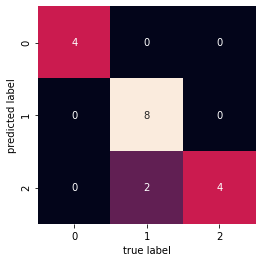

In [201]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
#plt.figure(figsize=(10,7))
mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [187]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      0.80      0.89        10
           3       0.67      1.00      0.80         4

    accuracy                           0.89        18
   macro avg       0.89      0.93      0.90        18
weighted avg       0.93      0.89      0.89        18



In [5]:
from numpy import mean
from numpy import std
import pandas as pd
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
%matplotlib inline
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=5, n_repeats=4, random_state=1)
# create model
model=tree.DecisionTreeClassifier(criterion='entropy')
# evaluate model
scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(scores)
# report performance
print('Accuracy: %.3f (%.3f)' % (100*mean(scores), 100*std(scores)))

[0.4 0.4 0.6 0.  0.8 0.4 0.4 0.4 0.4 0.8 0.4 0.  0.4 0.4 0.4 0.4 0.2 0.
 0.6 0.8]
Accuracy: 41.000 (23.216)


In [12]:
df["y"] = y.iloc[:,0]

In [13]:
import numpy as np
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

In [ ]:
##################for Thesis#############################################

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("d:/xxx.csv")
x=df.iloc[:,:15]
y=df.iloc[:,15:16]
A=x.T
A.shape
A.shape[0]


15

In [4]:
U, s, VT = svd(A)

In [3]:
from numpy import array
from numpy import diag
from numpy import dot
from numpy import zeros
from scipy.linalg import svd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
U, s, VT = svd(A)
# reciprocals of s
d = 1.0 / s
Sigma = zeros((A.shape[0], A.shape[1]))
# populate Sigma with n x n diagonal matrix
Sigma[:A.shape[0], :A.shape[0]] = diag(d)
n_elements = 6
Sigma = Sigma[:n_elements, :n_elements]
VT = VT[:n_elements, :]
U=U[:, :n_elements]


In [342]:
ref=[]
student=[]

for i in range(0,75):
    ref.append(np.array((x.iloc[i])))
    
for i in range(75,86):
    student.append(np.array((x.iloc[i])))




In [343]:
ref1=[]
student1=[]
for i in range(0,75):
    ref1.append(ref[i].dot(U.dot(Sigma)))
    
for i in range(0,11):
    student1.append(student[i].dot(U.dot(Sigma)))
    

y_train=y.iloc[0:75,0]
y_test=y.iloc[75:86,0]


In [323]:
import pandas as pd
import numpy as np


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
neigh = KNeighborsClassifier(n_neighbors=3)
#x_test.shape

neigh.fit(ref1, y_train)
y_pred=neigh.predict(student1)

accuracy_score(y_pred,y_test)




0.9090909090909091

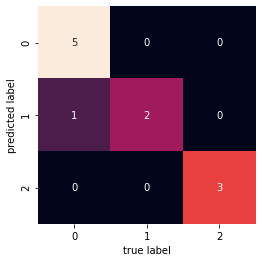

In [324]:

from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
#plt.figure(figsize=(10,7))
mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');





In [325]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      0.83      0.91         6
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         3

    accuracy                           0.91        11
   macro avg       0.89      0.94      0.90        11
weighted avg       0.94      0.91      0.91        11



In [356]:
import pandas as pd
import numpy as np
df=pd.read_csv("d:/xxx.csv")
x=df.iloc[:,:15]
y=df.iloc[:,15:16]
A=x.T
A.shape
A.shape[0]


15

In [412]:
from numpy import array
from numpy import diag
from numpy import dot
from numpy import zeros
from scipy.linalg import svd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
U, s, VT = svd(A)
# reciprocals of s
d = 1.0 / s
Sigma = zeros((A.shape[0], A.shape[1]))
# populate Sigma with n x n diagonal matrix
Sigma[:A.shape[0], :A.shape[0]] = diag(d)
n_elements = 8
Sigma = Sigma[:n_elements, :n_elements]
VT = VT[:n_elements, :]
U=U[:, :n_elements]


In [413]:
ref=[]
student=[]

for i in range(0,75):
    ref.append(np.array((x.iloc[i])))
    
for i in range(75,86):
    student.append(np.array((x.iloc[i])))


In [414]:
ref1=[]
student1=[]
for i in range(0,75):
    ref1.append(ref[i].dot(U.dot(Sigma)))
    
for i in range(0,11):
    student1.append(student[i].dot(U.dot(Sigma)))
    

y_train=y.iloc[0:75,0]
y_test=y.iloc[75:86,0]


In [415]:
a=0
#output=8
for i in range (0,11):
    for j in range(0,75):
        x1=student1[i].reshape(1,-1)
        x2=ref1[j].reshape(1,-1)
        if(cosine_similarity(x1,x2)>0.80):
            output=y.iloc[j]
            a=cosine_similarity(x1,x2)
        #else:
         #   if(cosine_similarity(x1,x2)>a):
          #      a=cosine_similarity(x1,x2)
           #     output=y.iloc[j]
                #print(y.iloc[j])
    print("cosine similarityis =",a)
    print("output albel is=",output)   
    y_pred[i]=output


cosine similarityis = [[0.85317448]]
output albel is= output    1
Name: 63, dtype: int64
cosine similarityis = [[0.97894907]]
output albel is= output    1
Name: 70, dtype: int64
cosine similarityis = [[0.87701471]]
output albel is= output    1
Name: 70, dtype: int64
cosine similarityis = [[0.82688964]]
output albel is= output    1
Name: 59, dtype: int64
cosine similarityis = [[0.95435021]]
output albel is= output    3
Name: 45, dtype: int64
cosine similarityis = [[0.892005]]
output albel is= output    2
Name: 51, dtype: int64
cosine similarityis = [[0.91505065]]
output albel is= output    1
Name: 68, dtype: int64
cosine similarityis = [[0.96452927]]
output albel is= output    2
Name: 72, dtype: int64
cosine similarityis = [[0.8349052]]
output albel is= output    2
Name: 74, dtype: int64
cosine similarityis = [[0.95273342]]
output albel is= output    2
Name: 60, dtype: int64
cosine similarityis = [[0.82125765]]
output albel is= output    3
Name: 48, dtype: int64


0.8181818181818182

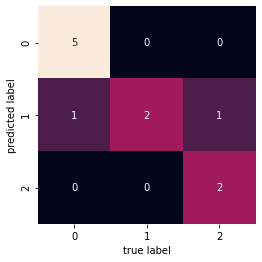

In [416]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
#plt.figure(figsize=(10,7))
mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
accuracy_score(y_pred,y_test)

In [419]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      0.83      0.91         6
           2       0.50      1.00      0.67         2
           3       1.00      0.67      0.80         3

    accuracy                           0.82        11
   macro avg       0.83      0.83      0.79        11
weighted avg       0.91      0.82      0.84        11



In [19]:
print(cosine_similarity(x2,y1))

print(cosine_similarity(x2,y2))
print(cosine_similarity(x2,y3))
print(cosine_similarity(x2,y4))
print(cosine_similarity(x2,y5))
print(cosine_similarity(x2,y6))
print(cosine_similarity(x2,y7))
print(cosine_similarity(x2,y8))
print(cosine_similarity(x2,y9))

[[0.99312374]]
[[0.25915479]]
[[0.91853336]]
[[-0.27126122]]
[[-0.42997787]]
[[-0.1377701]]
[[-0.03518626]]
[[0.552559]]
[[0.99867885]]


In [18]:

from numpy import array
from numpy import diag
from numpy import dot
from numpy import zeros
from scipy.linalg import svd
# define a matrix

'''
# Singular-value decomposition
U, s, VT = svd(A)
# create m x n Sigma matrix
Sigma = zeros((A.shape[0], A.shape[1]))
# populate Sigma with n x n diagonal matrix
Sigma[:A.shape[0], :A.shape[0]] = diag(s)
# reconstruct matrix
B = U.dot(Sigma.dot(VT))
B

'''
#print(A)
# Singular-value decomposition
U, s, VT = svd(A)
# create m x n Sigma matrix
Sigma = zeros((A.shape[0], A.shape[1]))
# populate Sigma with n x n diagonal matrix
Sigma[:A.shape[1], :A.shape[1]] = diag(s)
# select
n_elements = 2
Sigma = Sigma[:, :n_elements]
VT = VT[:n_elements, :]
# reconstruct
#B = U.dot(Sigma.dot(VT))
#print(B)
# transform
T = U.dot(Sigma)
print(T)
T = A.dot(VT.T)










[[-5.43292142 -1.41443146]
 [-3.56792447  3.58647229]
 [-3.10789822 -1.31452503]
 [-2.9910326   0.62852012]
 [-3.11488412  1.26334101]
 [-2.68087304 -0.23583232]
 [-1.83677144 -0.13276713]
 [-1.83677144 -0.13276713]
 [-5.36417609 -0.52352878]
 [-5.74668158 -1.06478259]
 [-1.08650715  0.39299528]
 [-1.50876936  0.48022246]
 [-3.26859698  0.57462039]
 [-3.91169445  0.04500543]]
                      0         1
no_slides     -5.432921 -1.414431
no_Table      -3.567924  3.586472
no_Picture    -3.107898 -1.314525
No_fonttypes  -2.991033  0.628520
No_fontcolor  -3.114884  1.263341
Bold          -2.680873 -0.235832
Underline     -1.836771 -0.132767
Italic        -1.836771 -0.132767
Max_font_size -5.364176 -0.523529
Min_font_size -5.746682 -1.064783
no_of_hlink   -1.086507  0.392995
footer        -1.508769  0.480222
Date          -3.268597  0.574620
Slide number  -3.911694  0.045005


In [19]:
#Sigma[:A.shape[0], :A.shape[0]]
U1=U[:,:2]
Sigma1=Sigma[:2,:2]
VT1=VT[:2,:]
B1 = U1.dot(Sigma1.dot(VT1))
VT1

array([[-0.43283595, -0.42871556, -0.31376016, -0.19246775, -0.22122791,
        -0.19003774, -0.32154873, -0.33003494, -0.44271205],
       [ 0.50491871, -0.26095493,  0.34964887, -0.29655898, -0.36328906,
        -0.24469484, -0.26480748, -0.29757677,  0.34092318]])

In [20]:
VT.shape

(2, 9)

In [21]:
x1=[-0.40372668,-0.36072329]
x2=[-0.20845189,0.06183574]
x3=[-0.43250535,0.54504857]
x4=[-0.43842524,-0.25291924]
x5=[-0.34537217,-0.46299475]
x6=[-0.33751,-0.14762436]
x7=[-0.27068834,0.39128387]
x8=[-0.32834113,0.34021876]